In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import pylab as py
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy.stats import f_oneway
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import metrics

In [2]:
dataset = pd.read_excel('fatal-police-shootings-data.xls')

In [3]:
Boolean_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'bool']
print(Boolean_features)

['signs_of_mental_illness', 'body_camera', 'is_geocoding_exact']


In [4]:
dataset.drop(['name', 'id','date','longitude','latitude'], axis=1, inplace=True)

In [5]:
dataset.drop(['city'],axis=1, inplace=True)

In [6]:
for col in Boolean_features:
    dataset[col] = np.where(dataset[col], 1, 0)

In [7]:
dataset=dataset.dropna()

In [8]:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']
print(categorical_features)

['manner_of_death', 'armed', 'gender', 'race', 'state', 'threat_level', 'flee']


In [9]:
finaldataset=dataset

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for column in categorical_features:
    finaldataset[column]= encoder.fit_transform(dataset[column])

In [11]:
finaldataset.drop(['is_geocoding_exact'], axis=1, inplace=True)

In [12]:
finaldataset

manner_of_death  armed   age  gender  race  state  \
0                   0     38  53.0       1     0     47   
1                   0     38  47.0       1     5     37   
2                   1     89  23.0       1     2     16   
3                   0     88  32.0       1     5      4   
4                   0     65  39.0       1     2      5   
...               ...    ...   ...     ...   ...    ...   
7977                0     38  30.0       1     5      3   
7981                0     38  28.0       1     5      4   
7984                0     38  58.0       0     5     43   
7987                0      6  30.0       1     5     43   
7990                0     38  63.0       1     5      9   

      signs_of_mental_illness  threat_level  flee  body_camera  
0                           1             0     2            0  
1                           0             0     2            0  
2                           0             1     2            0  
3                           1             0     2            0  
4                           0             0     2            0  
...                       ...           ...   ...          ...  
7977                        0             1     1            1  
7981                        0             0     1            0  
7984                        0             1     0            0  
7987                        0             1     1            0  
7990                        1             0     2            0  

[5603 rows x 10 columns]

from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score

#X = finaldataset[['age', 'gender', 'race', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera','longitude','latitude']]
X = finaldataset[['manner_of_death', 'armed', 'age', 'gender', 'race', 'state',
       'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera']]
dbscan = DBSCAN(eps=15, min_samples=70)
dbscan.fit_predict(X)  

# Fix the core_samples_mask line
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_  

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

fig=plt.figure(figsize=(10, 10))
#ax = fig.add_subplot(111, projection='3d')

# Plot the clusters
unique_labels = set(labels)
print(unique_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        class_member_mask = (labels == k)
        print(class_member_mask.sum(),k)
        xy = X_pca[class_member_mask]
        #ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], c='black', marker='o', s=6)
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markersize=2)
    else:
        class_member_mask = (labels == k)
        xy = X_pca[class_member_mask & core_samples_mask]
        #ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], c='blue', marker='o', s=6)
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markersize=2)
        xy = X_pca[class_member_mask & ~core_samples_mask]
        #ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], c='red', marker='o', s=6)
        plt.plot(xy[:, 0], xy[:, 1], 'o',markerfacecolor=col, markersize=2)

#ax.set_title(f'Estimated number of clusters: {n_clusters}')
#ax.view_init(20,-120)
plt.title(f'Estimated number of clusters: {n_clusters}')
plt.legend()
plt.show()
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)

#for checking
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

epsilon = [10,11,12,13,16,17,18,19,20,22,21]
min_samples = [200,250,300,400,420,460,480,500,550,600,610,650]

sil_avg = []
max_value = [0, 0, 0, 0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):
        db = DBSCAN(min_samples=min_samples[j], eps=epsilon[i]).fit(X1)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        
        n_noise_ = list(labels).count(-1)
        if n_clusters_ > 1:
            silhouette_avg = metrics.silhouette_score(X1, labels)
            if silhouette_avg > max_value[3]:
                max_value = (epsilon[i], min_samples[j], n_clusters_ , silhouette_avg)
            sil_avg.append(silhouette_avg)
print(':n_n_clusters_clusters_:',n_clusters_)
print("epsilon =", max_value[0],
      "\nmin_samples =", max_value[1],
      "\nnumber of clusters =", max_value[2],
      "\naverage silhouette score = %.4f" % max_value[3])

In [13]:
endataset=dataset

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for column in categorical_features:
    endataset[column]= encoder.fit_transform(dataset[column])
    mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    print(f"Mapping for {column}: {mapping}")

Mapping for manner_of_death: {0: 0, 1: 1}
Mapping for armed: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65, 66: 66, 67: 67, 68: 68, 69: 69, 70: 70, 71: 71, 72: 72, 73: 73, 74: 74, 75: 75, 76: 76, 77: 77, 78: 78, 79: 79, 80: 80, 81: 81, 82: 82, 83: 83, 84: 84, 85: 85, 86: 86, 87: 87, 88: 88, 89: 89, 90: 90, 91: 91, 92: 92, 93: 93, 94: 94, 95: 95, 96: 96, 97: 97}
Mapping for gender: {0: 0, 1: 1}
Mapping for race: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
Mapping for state: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10

In [15]:
dataset

manner_of_death  armed   age  gender  race  state  \
0                   0     38  53.0       1     0     47   
1                   0     38  47.0       1     5     37   
2                   1     89  23.0       1     2     16   
3                   0     88  32.0       1     5      4   
4                   0     65  39.0       1     2      5   
...               ...    ...   ...     ...   ...    ...   
7977                0     38  30.0       1     5      3   
7981                0     38  28.0       1     5      4   
7984                0     38  58.0       0     5     43   
7987                0      6  30.0       1     5     43   
7990                0     38  63.0       1     5      9   

      signs_of_mental_illness  threat_level  flee  body_camera  
0                           1             0     2            0  
1                           0             0     2            0  
2                           0             1     2            0  
3                           1             0     2            0  
4                           0             0     2            0  
...                       ...           ...   ...          ...  
7977                        0             1     1            1  
7981                        0             0     1            0  
7984                        0             1     0            0  
7987                        0             1     1            0  
7990                        1             0     2            0  

[5603 rows x 10 columns]

In [16]:
endataset.columns

Index(['manner_of_death', 'armed', 'age', 'gender', 'race', 'state',
       'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera'],
      dtype='object')

C:\Users\pooja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pooja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pooja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pooja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

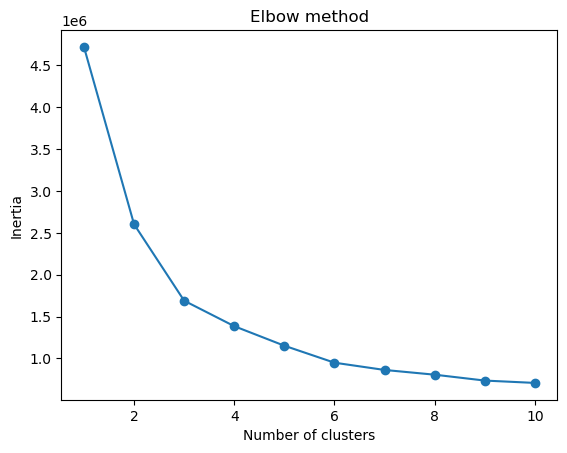

In [17]:
k_values = range(1, 11) 
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(endataset)
    inertias.append(kmeans.inertia_)

plt.plot(k_values, inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

C:\Users\pooja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.5914986673267161


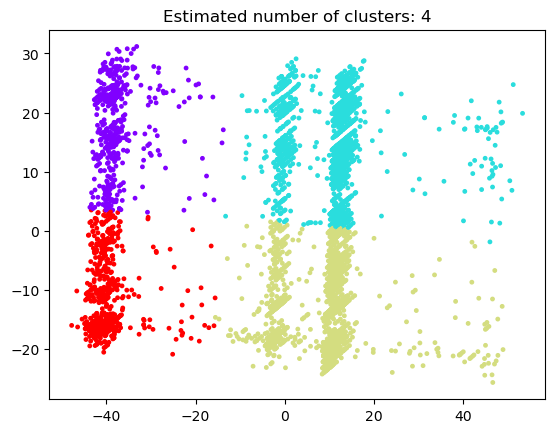

In [18]:
k = 4
pca = PCA(n_components=2)
X_pca = pca.fit_transform(endataset)
kmeans = KMeans(n_clusters=k, random_state=0)
cluster_labels = kmeans.fit_predict(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels,
            s=6, cmap='rainbow');
plt.title(f'Estimated number of clusters: {k}')
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print("Silhouette Score:", silhouette_avg)

kmeans_silhouette = silhouette_score(X_pca, cluster_labels)
print(kmeans_silhouette)
dbscan_silhouette = silhouette_score(X, dbscan.labels_)
print(dbscan_silhouette)

C:\Users\pooja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.5914986673267417


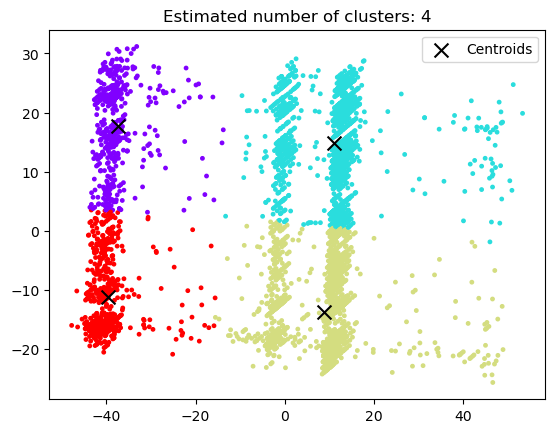

In [19]:
k = 4
pca = PCA(n_components=2)
X_pca = pca.fit_transform(endataset)
kmeans = KMeans(n_clusters=k, random_state=0)
cluster_labels = kmeans.fit_predict(X_pca)

# Plot the data points with cluster assignments
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, s=6, cmap='rainbow')
plt.title(f'Estimated number of clusters: {k}')

# Plot the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')

silhouette_avg = silhouette_score(X_pca, cluster_labels)
print("Silhouette Score:", silhouette_avg)

# Add a legend for centroids
plt.legend()

# Show the plot
plt.show()


Centroid 1: [-37.49662983  17.78552884]
Centroid 2: [10.91905054 14.92544861]
Centroid 3: [  8.71826487 -13.61928805]
Centroid 4: [-39.67903378 -11.18956059]
Silhouette Score: 0.5914986673267417


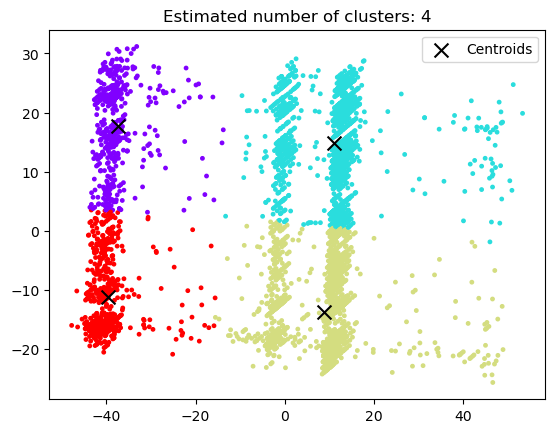

In [34]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, s=6, cmap='rainbow')
plt.title(f'Estimated number of clusters: {k}')

# Plot the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')

# Print the centroid values
for i, centroid in enumerate(centroids):
    print(f'Centroid {i + 1}: {centroid}')

silhouette_avg = silhouette_score(X_pca, cluster_labels)
print("Silhouette Score:", silhouette_avg)

# Add a legend for centroids
plt.legend()

# Show the plot
plt.show()

Cluster 0: 494 data points
Cluster 1: 2075 data points
Cluster 2: 2402 data points
Cluster 3: 632 data points


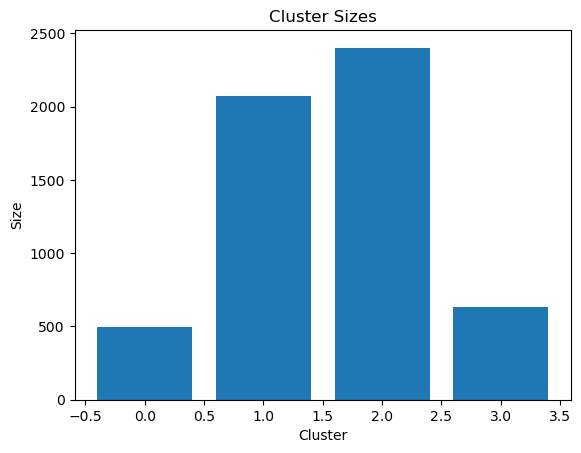

In [20]:
cluster_sizes = np.bincount(cluster_labels)

# Print the size of each cluster
for i, size in enumerate(cluster_sizes):
    print(f"Cluster {i}: {size} data points")

# Plot the cluster sizes as a bar plot
plt.bar(range(len(cluster_sizes)), cluster_sizes)
plt.xlabel('Cluster')
plt.ylabel('Size')
plt.title('Cluster Sizes')
plt.show()

Distance between Cluster 1 and Cluster 2: 48.50
Distance between Cluster 1 and Cluster 3: 55.88
Distance between Cluster 1 and Cluster 4: 29.06
Distance between Cluster 2 and Cluster 3: 28.63
Distance between Cluster 2 and Cluster 4: 56.94
Distance between Cluster 3 and Cluster 4: 48.46


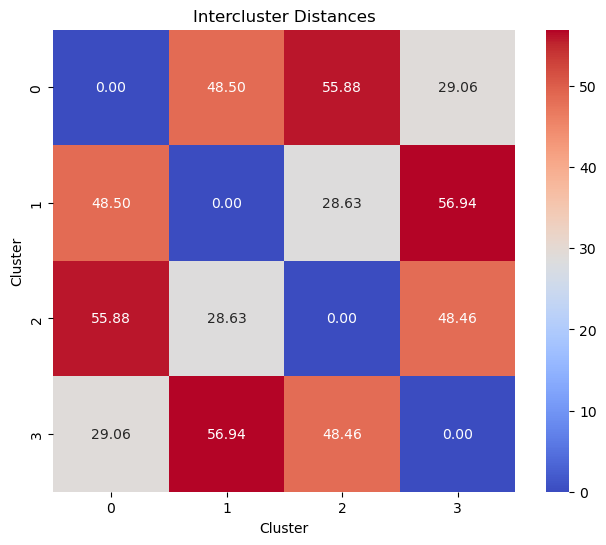

In [21]:
from sklearn.metrics import pairwise_distances
intercluster_distances = pairwise_distances(centroids, centroids)

# Print the intercluster distances
for i in range(len(centroids)):
    for j in range(i + 1, len(centroids)):
        distance = intercluster_distances[i, j]
        print(f"Distance between Cluster {i + 1} and Cluster {j + 1}: {distance:.2f}")
        
plt.figure(figsize=(8, 6))
sns.heatmap(intercluster_distances, annot=True, cmap='coolwarm', square=True, fmt=".2f")
plt.title('Intercluster Distances')
plt.xlabel('Cluster')
plt.ylabel('Cluster')
plt.show()

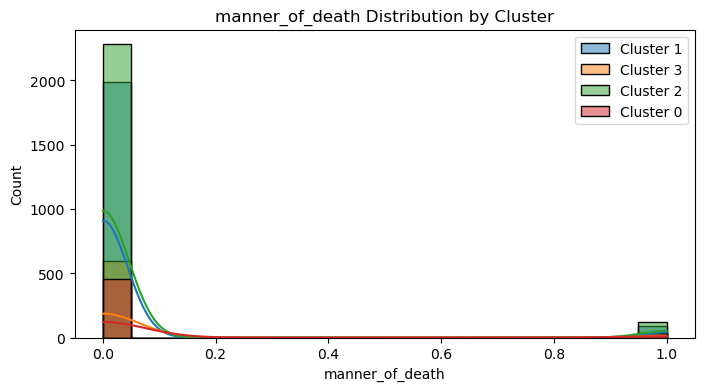

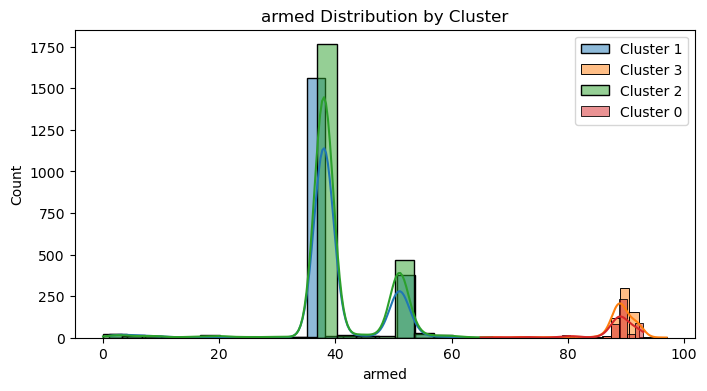

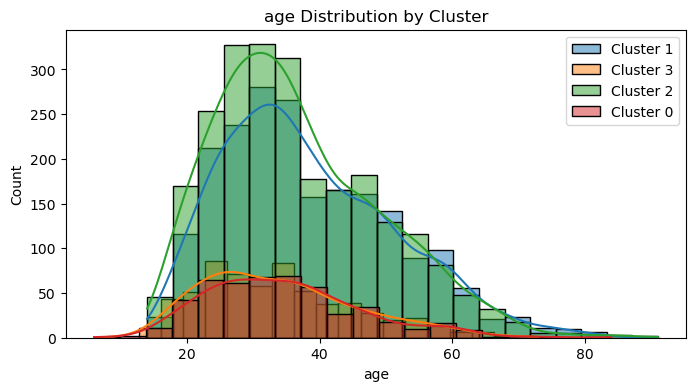

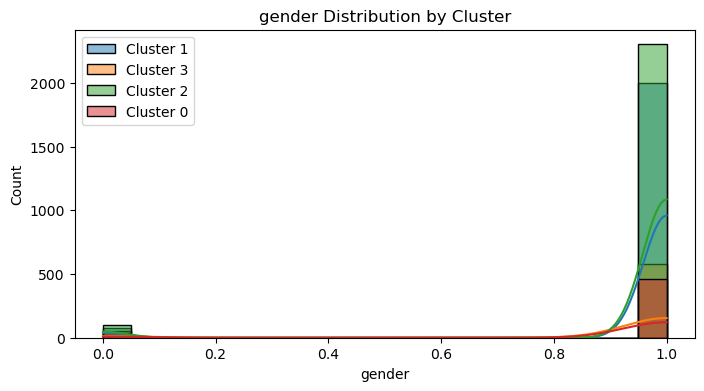

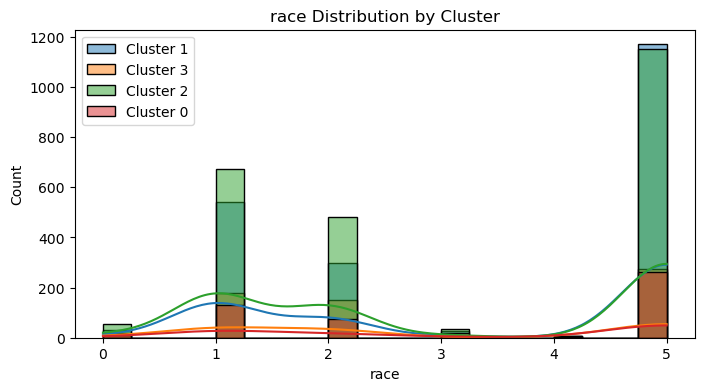

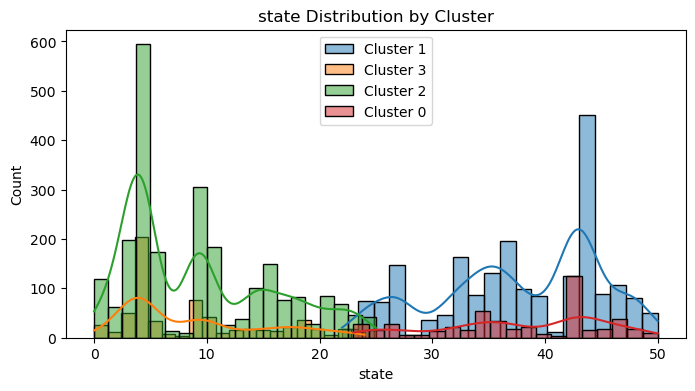

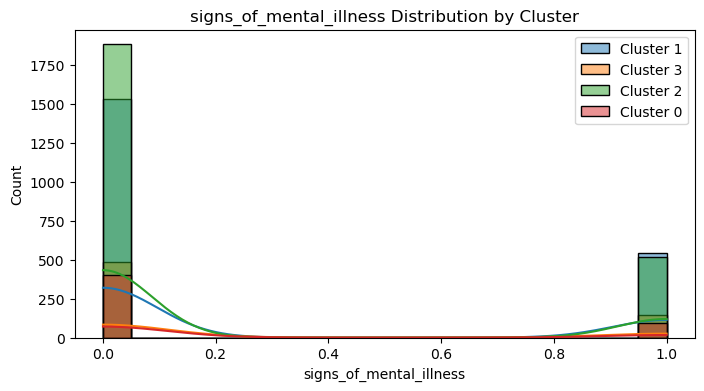

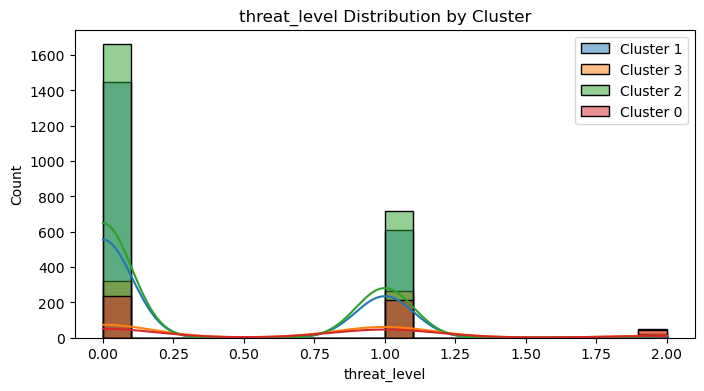

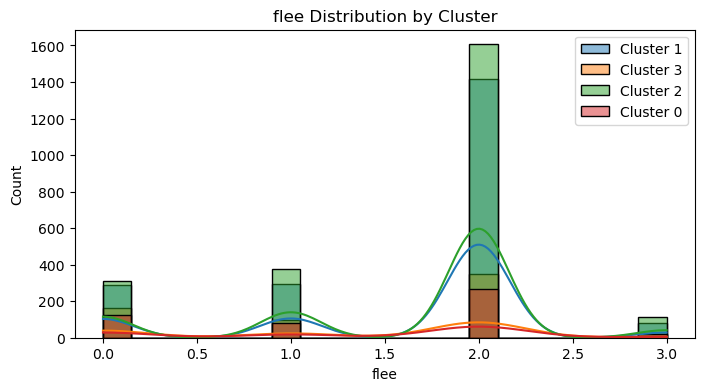

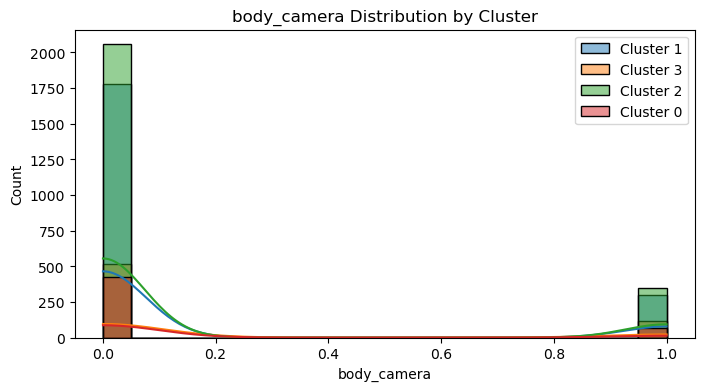

In [22]:

endataset['Cluster'] = cluster_labels
# Visualize feature distributions using histograms
for feature in endataset.columns[:-1]:  # Exclude the 'Cluster' column
    plt.figure(figsize=(8, 4))
    for cluster in endataset['Cluster'].unique():
        sns.histplot(endataset[endataset['Cluster'] == cluster][feature], kde=True, label=f'Cluster {cluster}', bins=20)
    plt.title(f'{feature} Distribution by Cluster')
    plt.legend()
    plt.show()

sns.pairplot(endataset, hue='Cluster')
plt.show()

In [23]:
endataset

manner_of_death  armed   age  gender  race  state  \
0                   0     38  53.0       1     0     47   
1                   0     38  47.0       1     5     37   
2                   1     89  23.0       1     2     16   
3                   0     88  32.0       1     5      4   
4                   0     65  39.0       1     2      5   
...               ...    ...   ...     ...   ...    ...   
7977                0     38  30.0       1     5      3   
7981                0     38  28.0       1     5      4   
7984                0     38  58.0       0     5     43   
7987                0      6  30.0       1     5     43   
7990                0     38  63.0       1     5      9   

      signs_of_mental_illness  threat_level  flee  body_camera  Cluster  
0                           1             0     2            0        1  
1                           0             0     2            0        1  
2                           0             1     2            0        3  
3                           1             0     2            0        3  
4                           0             0     2            0        3  
...                       ...           ...   ...          ...      ...  
7977                        0             1     1            1        2  
7981                        0             0     1            0        2  
7984                        0             1     0            0        1  
7987                        0             1     1            0        1  
7990                        1             0     2            0        2  

[5603 rows x 11 columns]

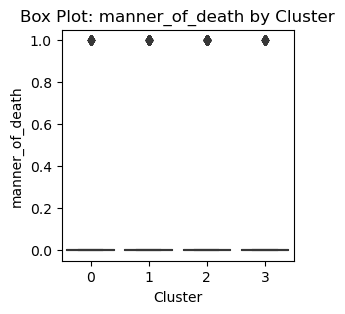

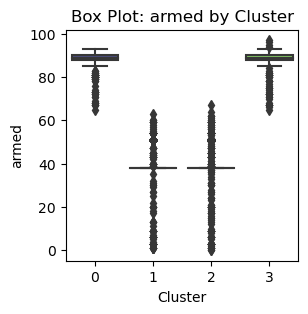

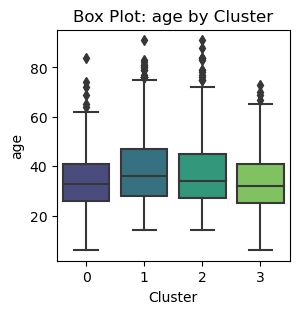

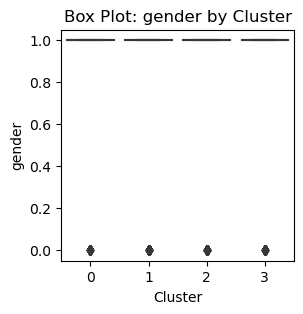

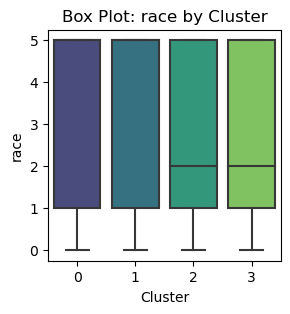

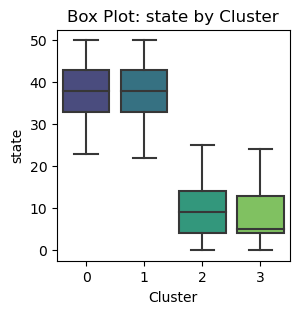

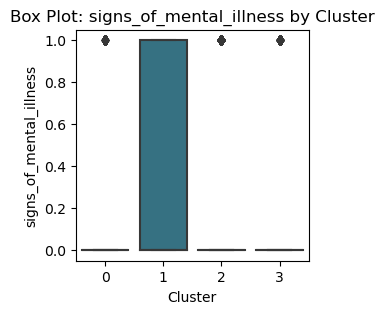

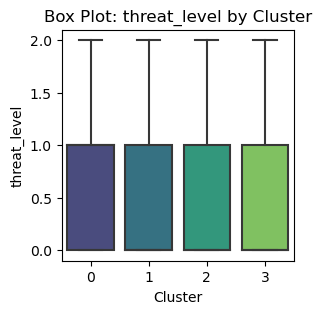

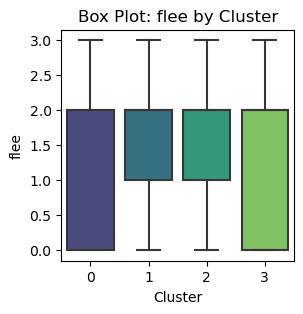

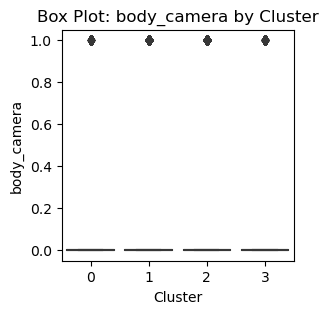

In [24]:
for feature in endataset.columns[:-1]:
    plt.figure(figsize=(3, 3))
    sns.boxplot(x='Cluster', y=feature, data=endataset, palette='viridis')
    plt.title(f'Box Plot: {feature} by Cluster')
    plt.show()

In [25]:
def generate_cluster_profiles(endataset, cluster_column, numerical_features):
    cluster_profiles = []

    for cluster in sorted(endataset[cluster_column].unique()):
        cluster_data = endataset[endataset[cluster_column] == cluster]
        profile = {"Cluster": cluster}
        numeric_summary = cluster_data[numerical_features].describe().transpose()
        profile.update(numeric_summary.to_dict())

        cluster_profiles.append(profile)

    return pd.DataFrame(cluster_profiles)
for col in endataset.columns[:-1]:
    cluster_profiles_df = generate_cluster_profiles(endataset, 'Cluster', col)
print(cluster_profiles_df)

   Cluster   count      mean       std  min  25%  50%  75%  max
0        0   494.0  0.133603  0.340570  0.0  0.0  0.0  0.0  1.0
1        1  2075.0  0.144096  0.351272  0.0  0.0  0.0  0.0  1.0
2        2  2402.0  0.143630  0.350788  0.0  0.0  0.0  0.0  1.0
3        3   632.0  0.186709  0.389986  0.0  0.0  0.0  0.0  1.0


C:\Users\pooja\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\pooja\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\pooja\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\pooja\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\pooja\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\pooja\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` va

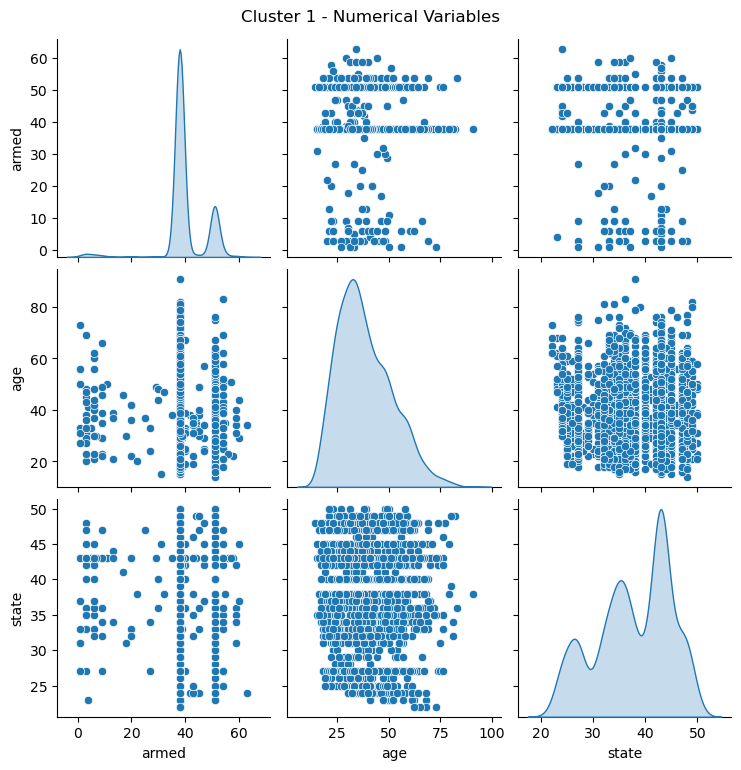

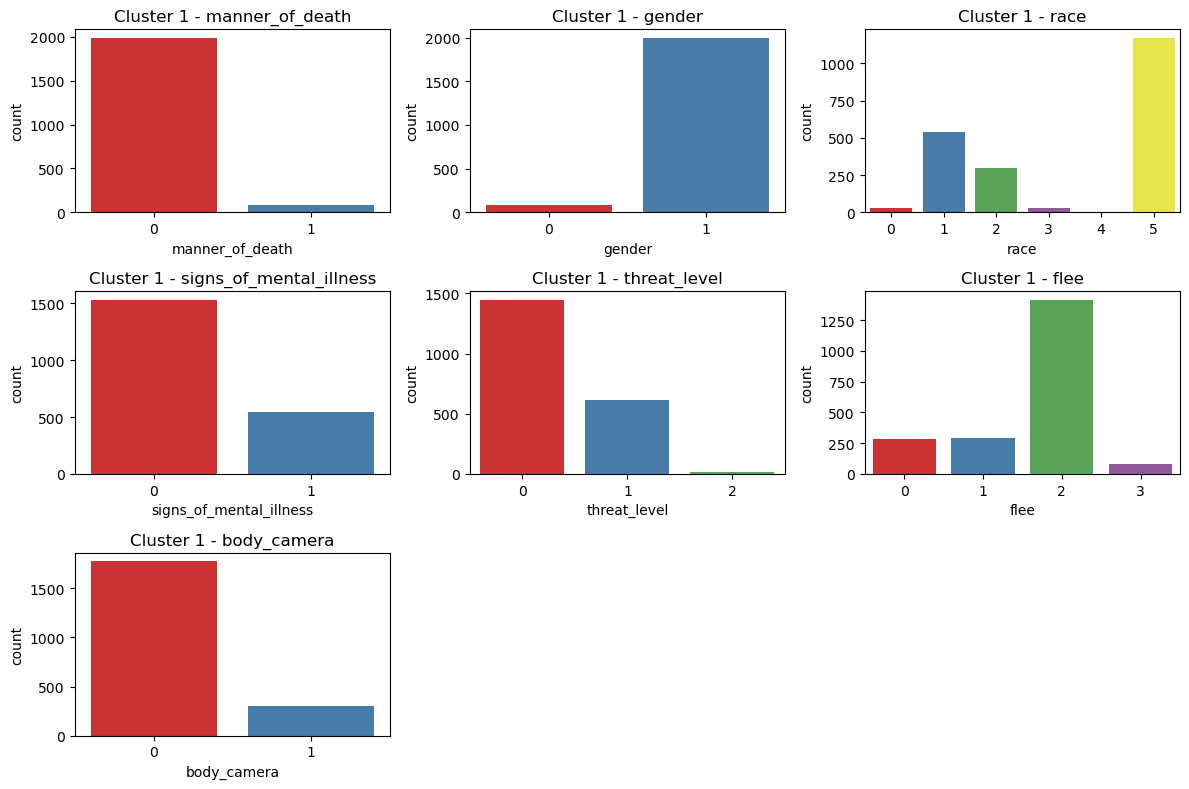

C:\Users\pooja\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\pooja\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\pooja\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\pooja\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\pooja\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\pooja\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` va

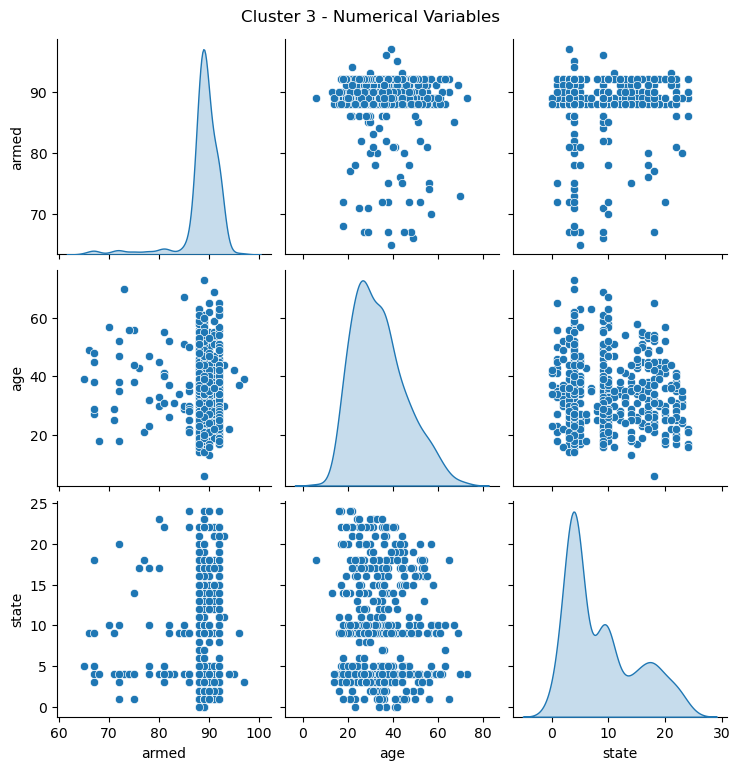

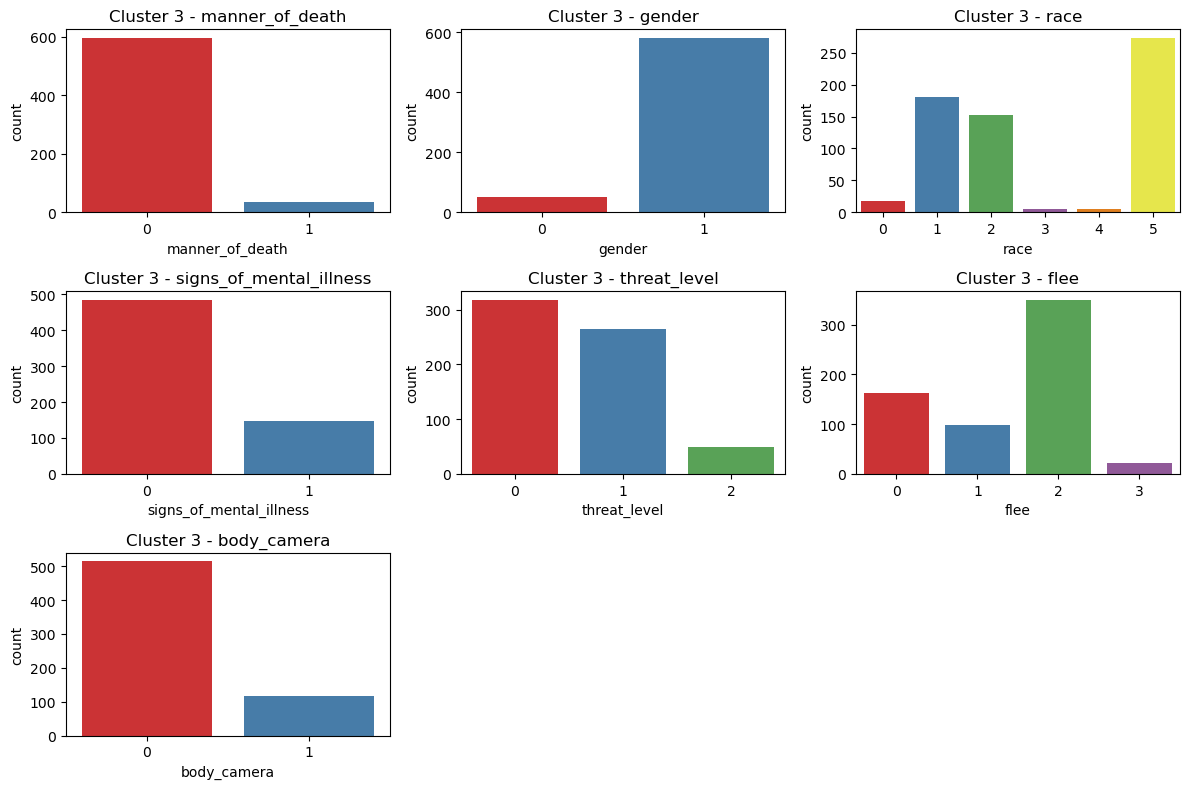

C:\Users\pooja\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\pooja\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\pooja\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\pooja\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\pooja\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\pooja\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` va

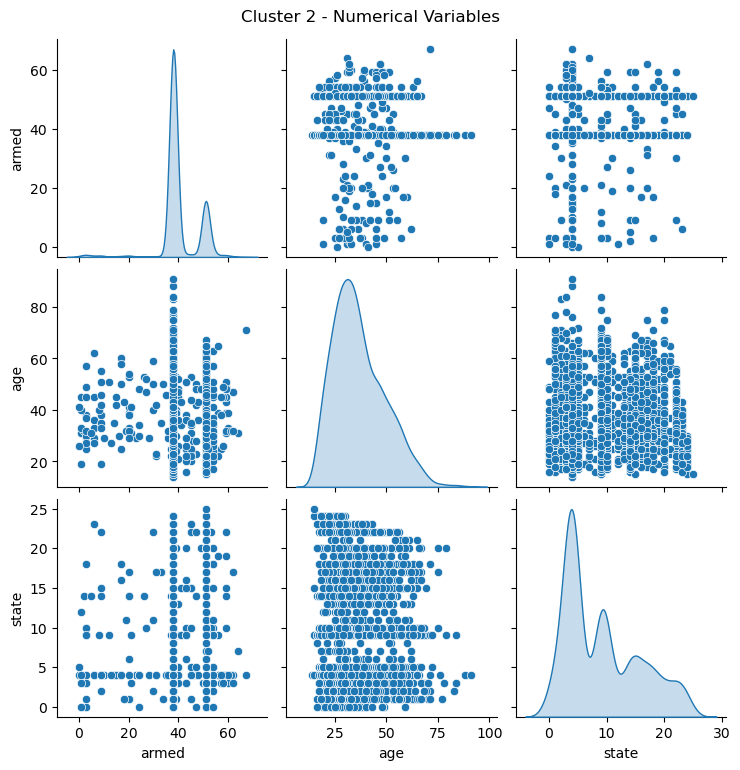

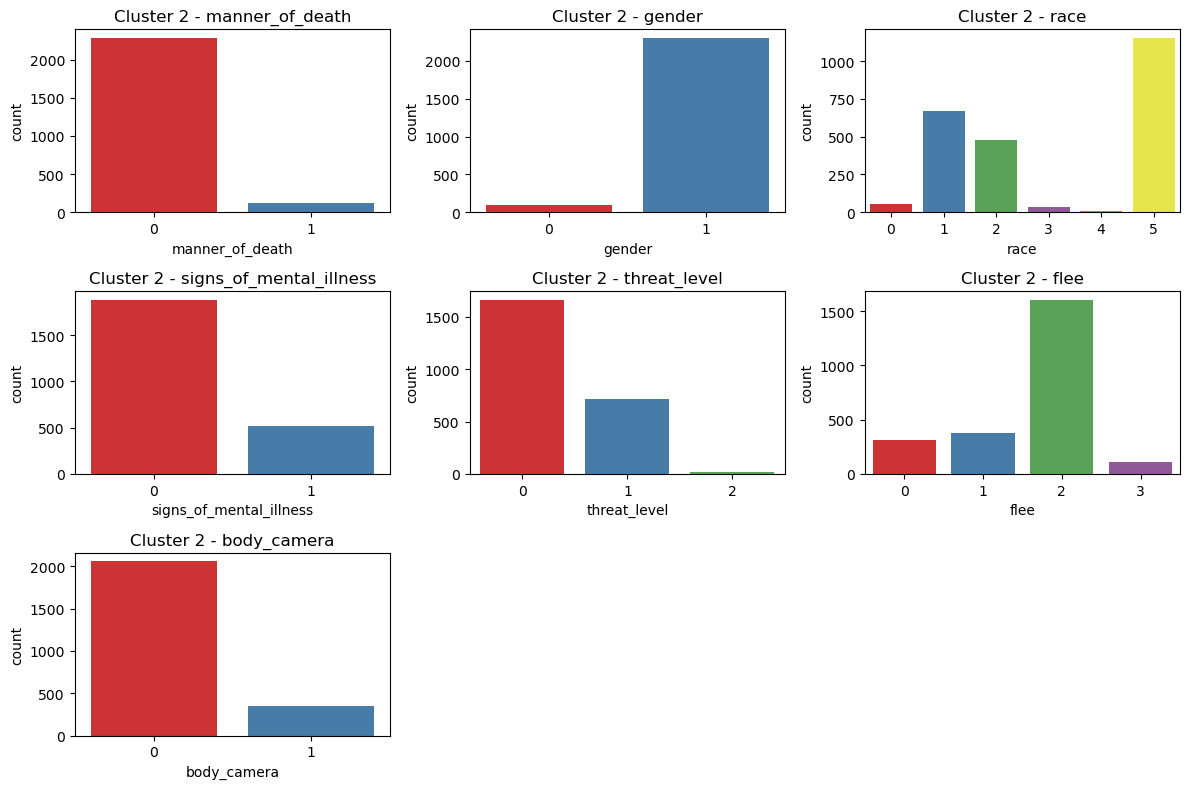

C:\Users\pooja\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\pooja\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\pooja\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\pooja\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\pooja\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\pooja\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` va

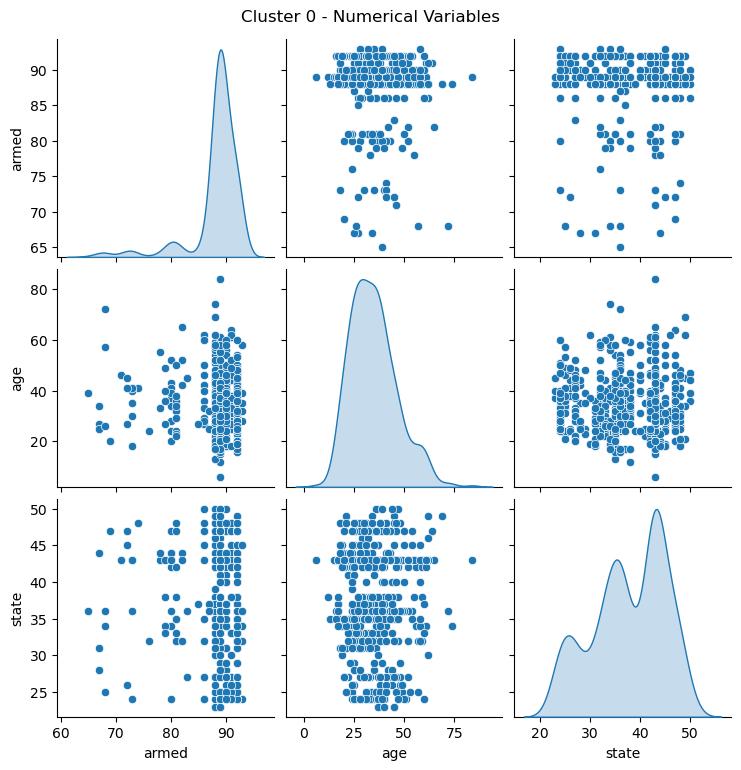

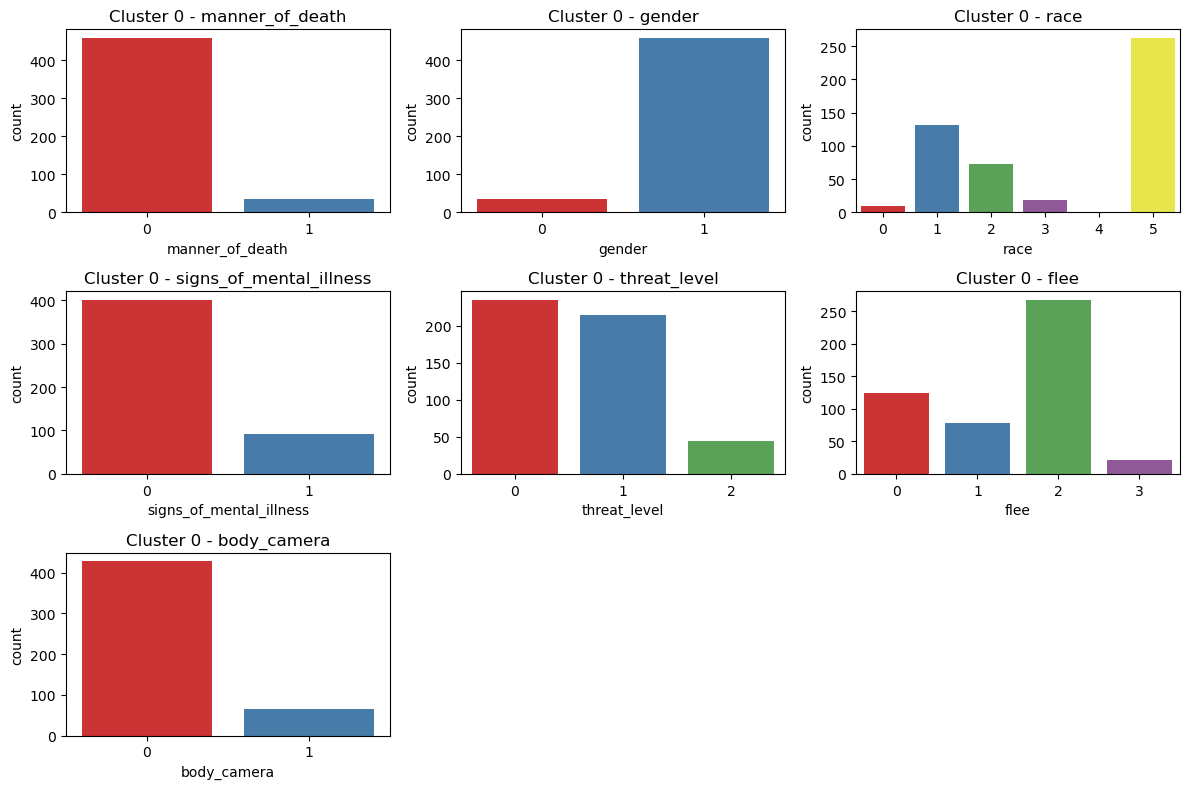

In [26]:
for cluster_num in endataset['Cluster'].unique():
    cluster_data = endataset[endataset['Cluster'] == cluster_num]
    cluster_profile = cluster_data.describe(include='all')
    
    f1_columns = ['armed', 'age', 'state']
    sns.pairplot(cluster_data[f1_columns], diag_kind='kde', markers='o', kind='scatter', palette='Set1')
    plt.suptitle(f"Cluster {cluster_num} - Numerical Variables", y=1.02)
    plt.show()

    f2_columns = ['manner_of_death', 'gender', 'race', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera']
    plt.figure(figsize=(12, 8))
    for i, column in enumerate(f2_columns, start=1):
        plt.subplot(3, 3, i)
        sns.countplot(x=column, data=cluster_data, palette='Set1')
        plt.title(f"Cluster {cluster_num} - {column}")
    plt.tight_layout()
    plt.show()


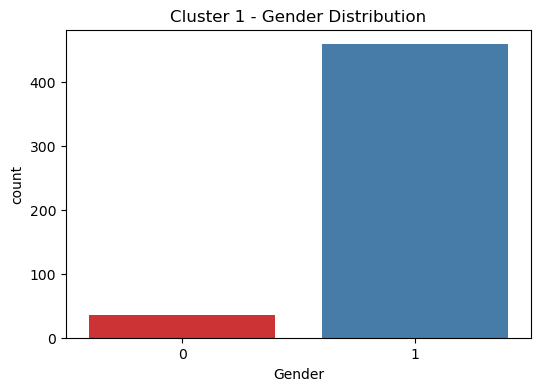

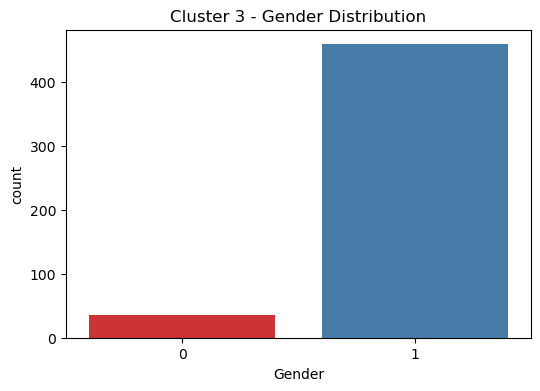

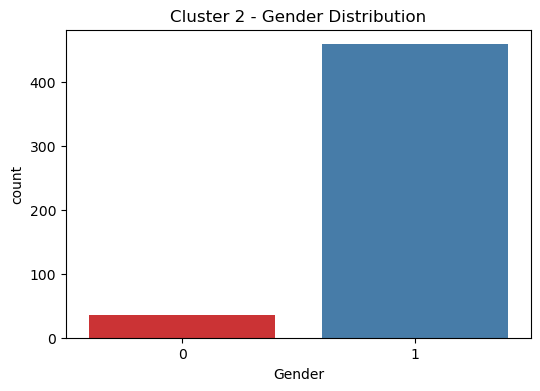

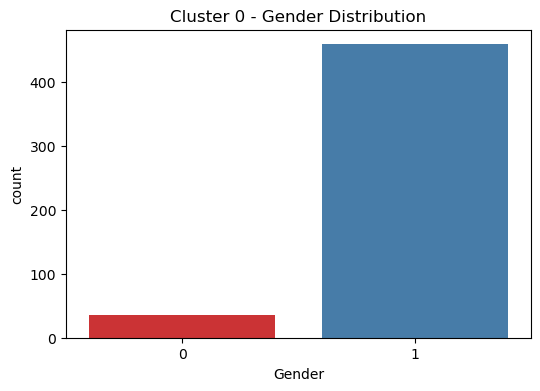

In [27]:
for cluster_num in endataset['Cluster'].unique():
    plt.figure(figsize=(6, 4))
    sns.countplot(x='gender', data=cluster_data, palette='Set1')
    plt.title(f"Cluster {cluster_num} - Gender Distribution")
    plt.xlabel("Gender")
    plt.show()

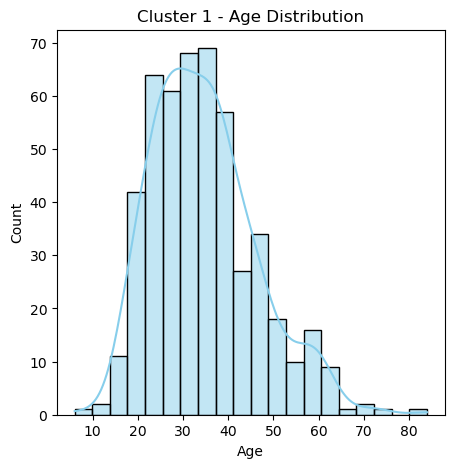

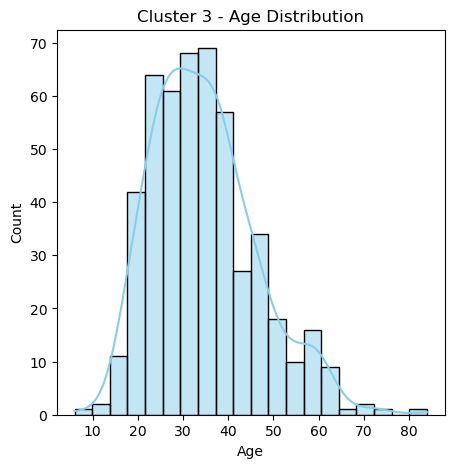

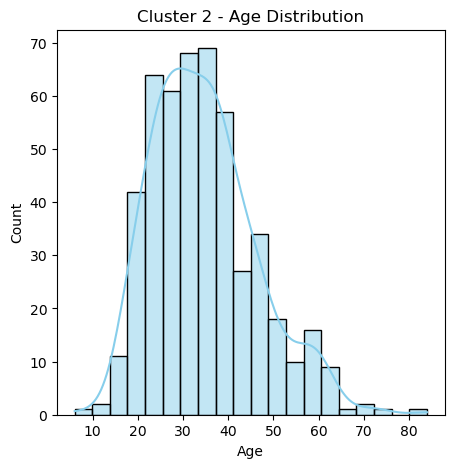

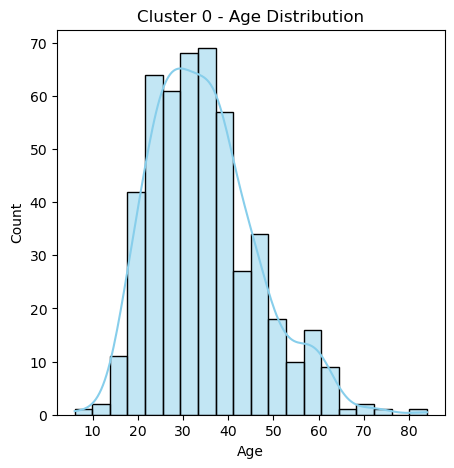

In [28]:
for cluster_num in endataset['Cluster'].unique():
    plt.figure(figsize=(5, 5))
    sns.histplot(cluster_data['age'], kde=True, color='skyblue', bins=20)
    plt.title(f"Cluster {cluster_num} - Age Distribution")
    plt.xlabel("Age")
    plt.show()

cluster_data,cluster       manner_of_death  armed   age  gender  race  state  \
0                   0     38  53.0       1     0     47   
1                   0     38  47.0       1     5     37   
5                   0     38  18.0       1     5     36   
11                  0     38  31.0       1     1     43   
12                  0     51  41.0       1     1     35   
...               ...    ...   ...     ...   ...    ...   
7967                0     38  32.0       1     5     24   
7968                0     38  65.0       1     5     43   
7976                0     38  39.0       1     5     45   
7984                0     38  58.0       0     5     43   
7987                0      6  30.0       1     5     43   

      signs_of_mental_illness  threat_level  flee  body_camera  
0                           1             0     2            0  
1                           0             0     2            0  
5                           0             0     2            0  
11        

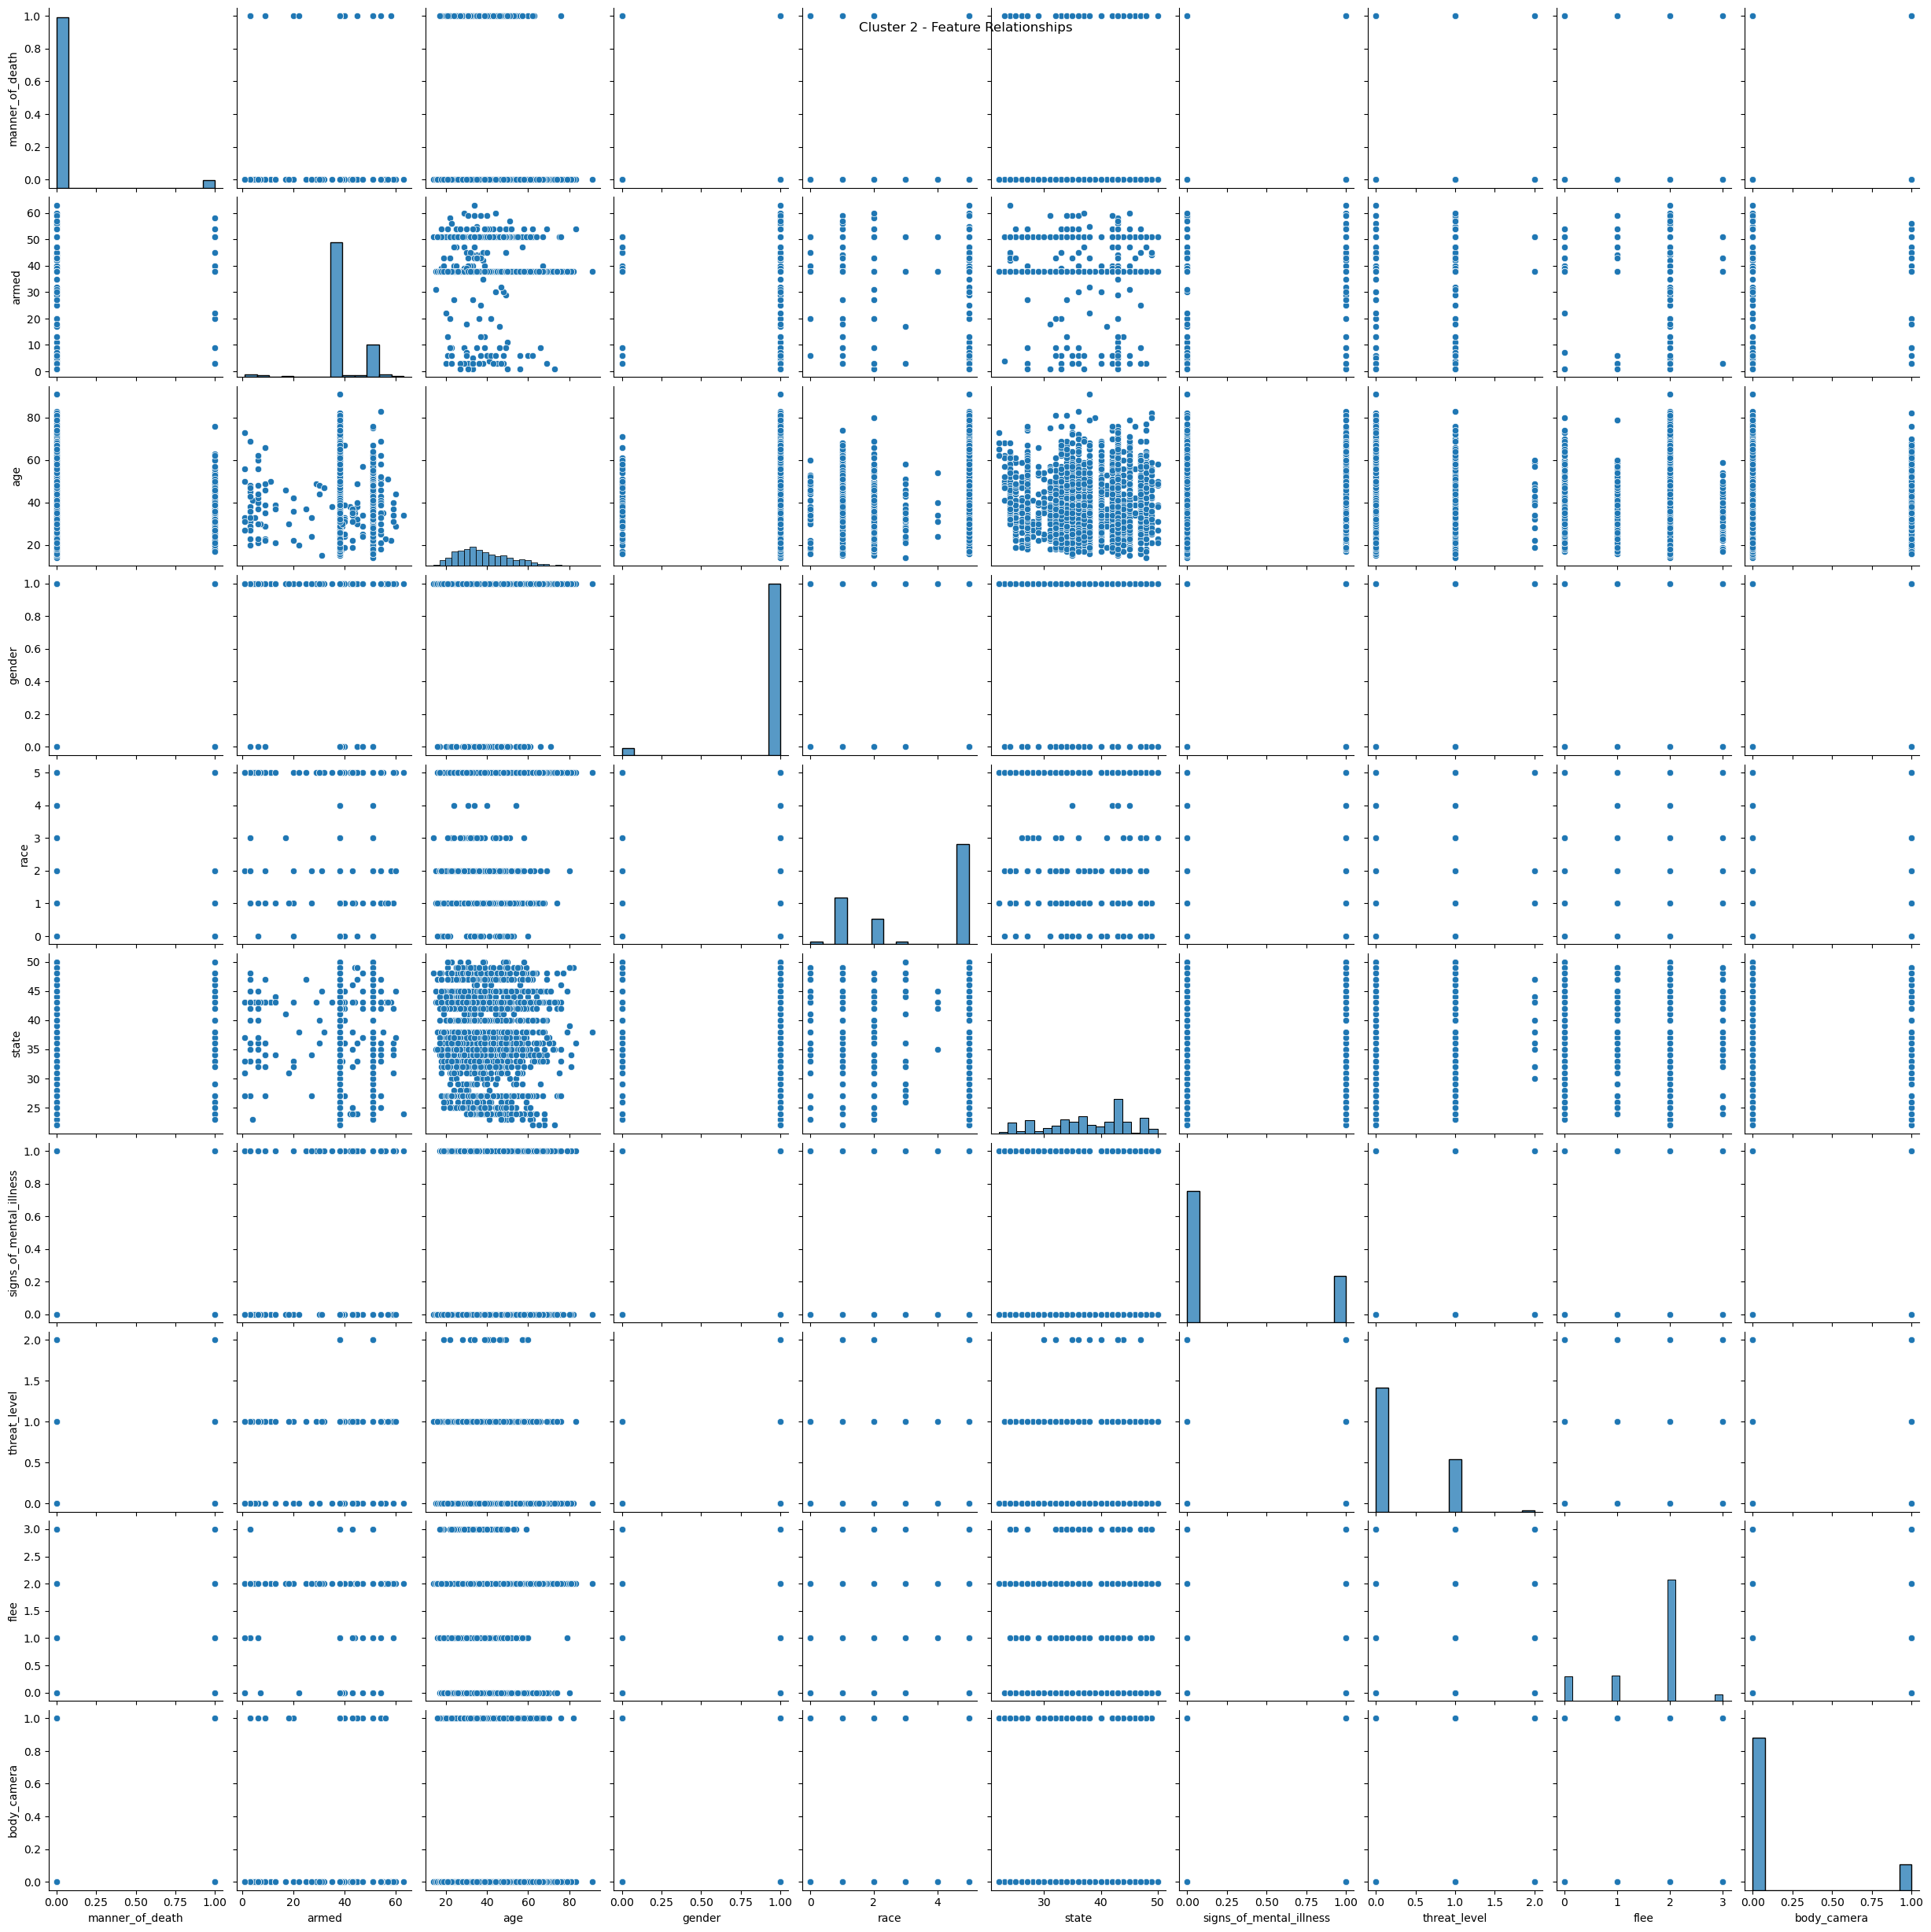

cluster_data,cluster       manner_of_death  armed   age  gender  race  state  \
2                   1     89  23.0       1     2     16   
3                   0     88  32.0       1     5      4   
4                   0     65  39.0       1     2      5   
8                   0     89  34.0       0     5     12   
17                  0     89  36.0       1     1      2   
...               ...    ...   ...     ...   ...    ...   
7776                0     89  36.0       1     2      3   
7796                0     92  63.0       1     5     10   
7863                0     90  31.0       1     1     18   
7880                0     91  22.0       1     1     17   
7896                0     91  36.0       1     1     15   

      signs_of_mental_illness  threat_level  flee  body_camera  
2                           0             1     2            0  
3                           1             0     2            0  
4                           0             0     2            0  
8         

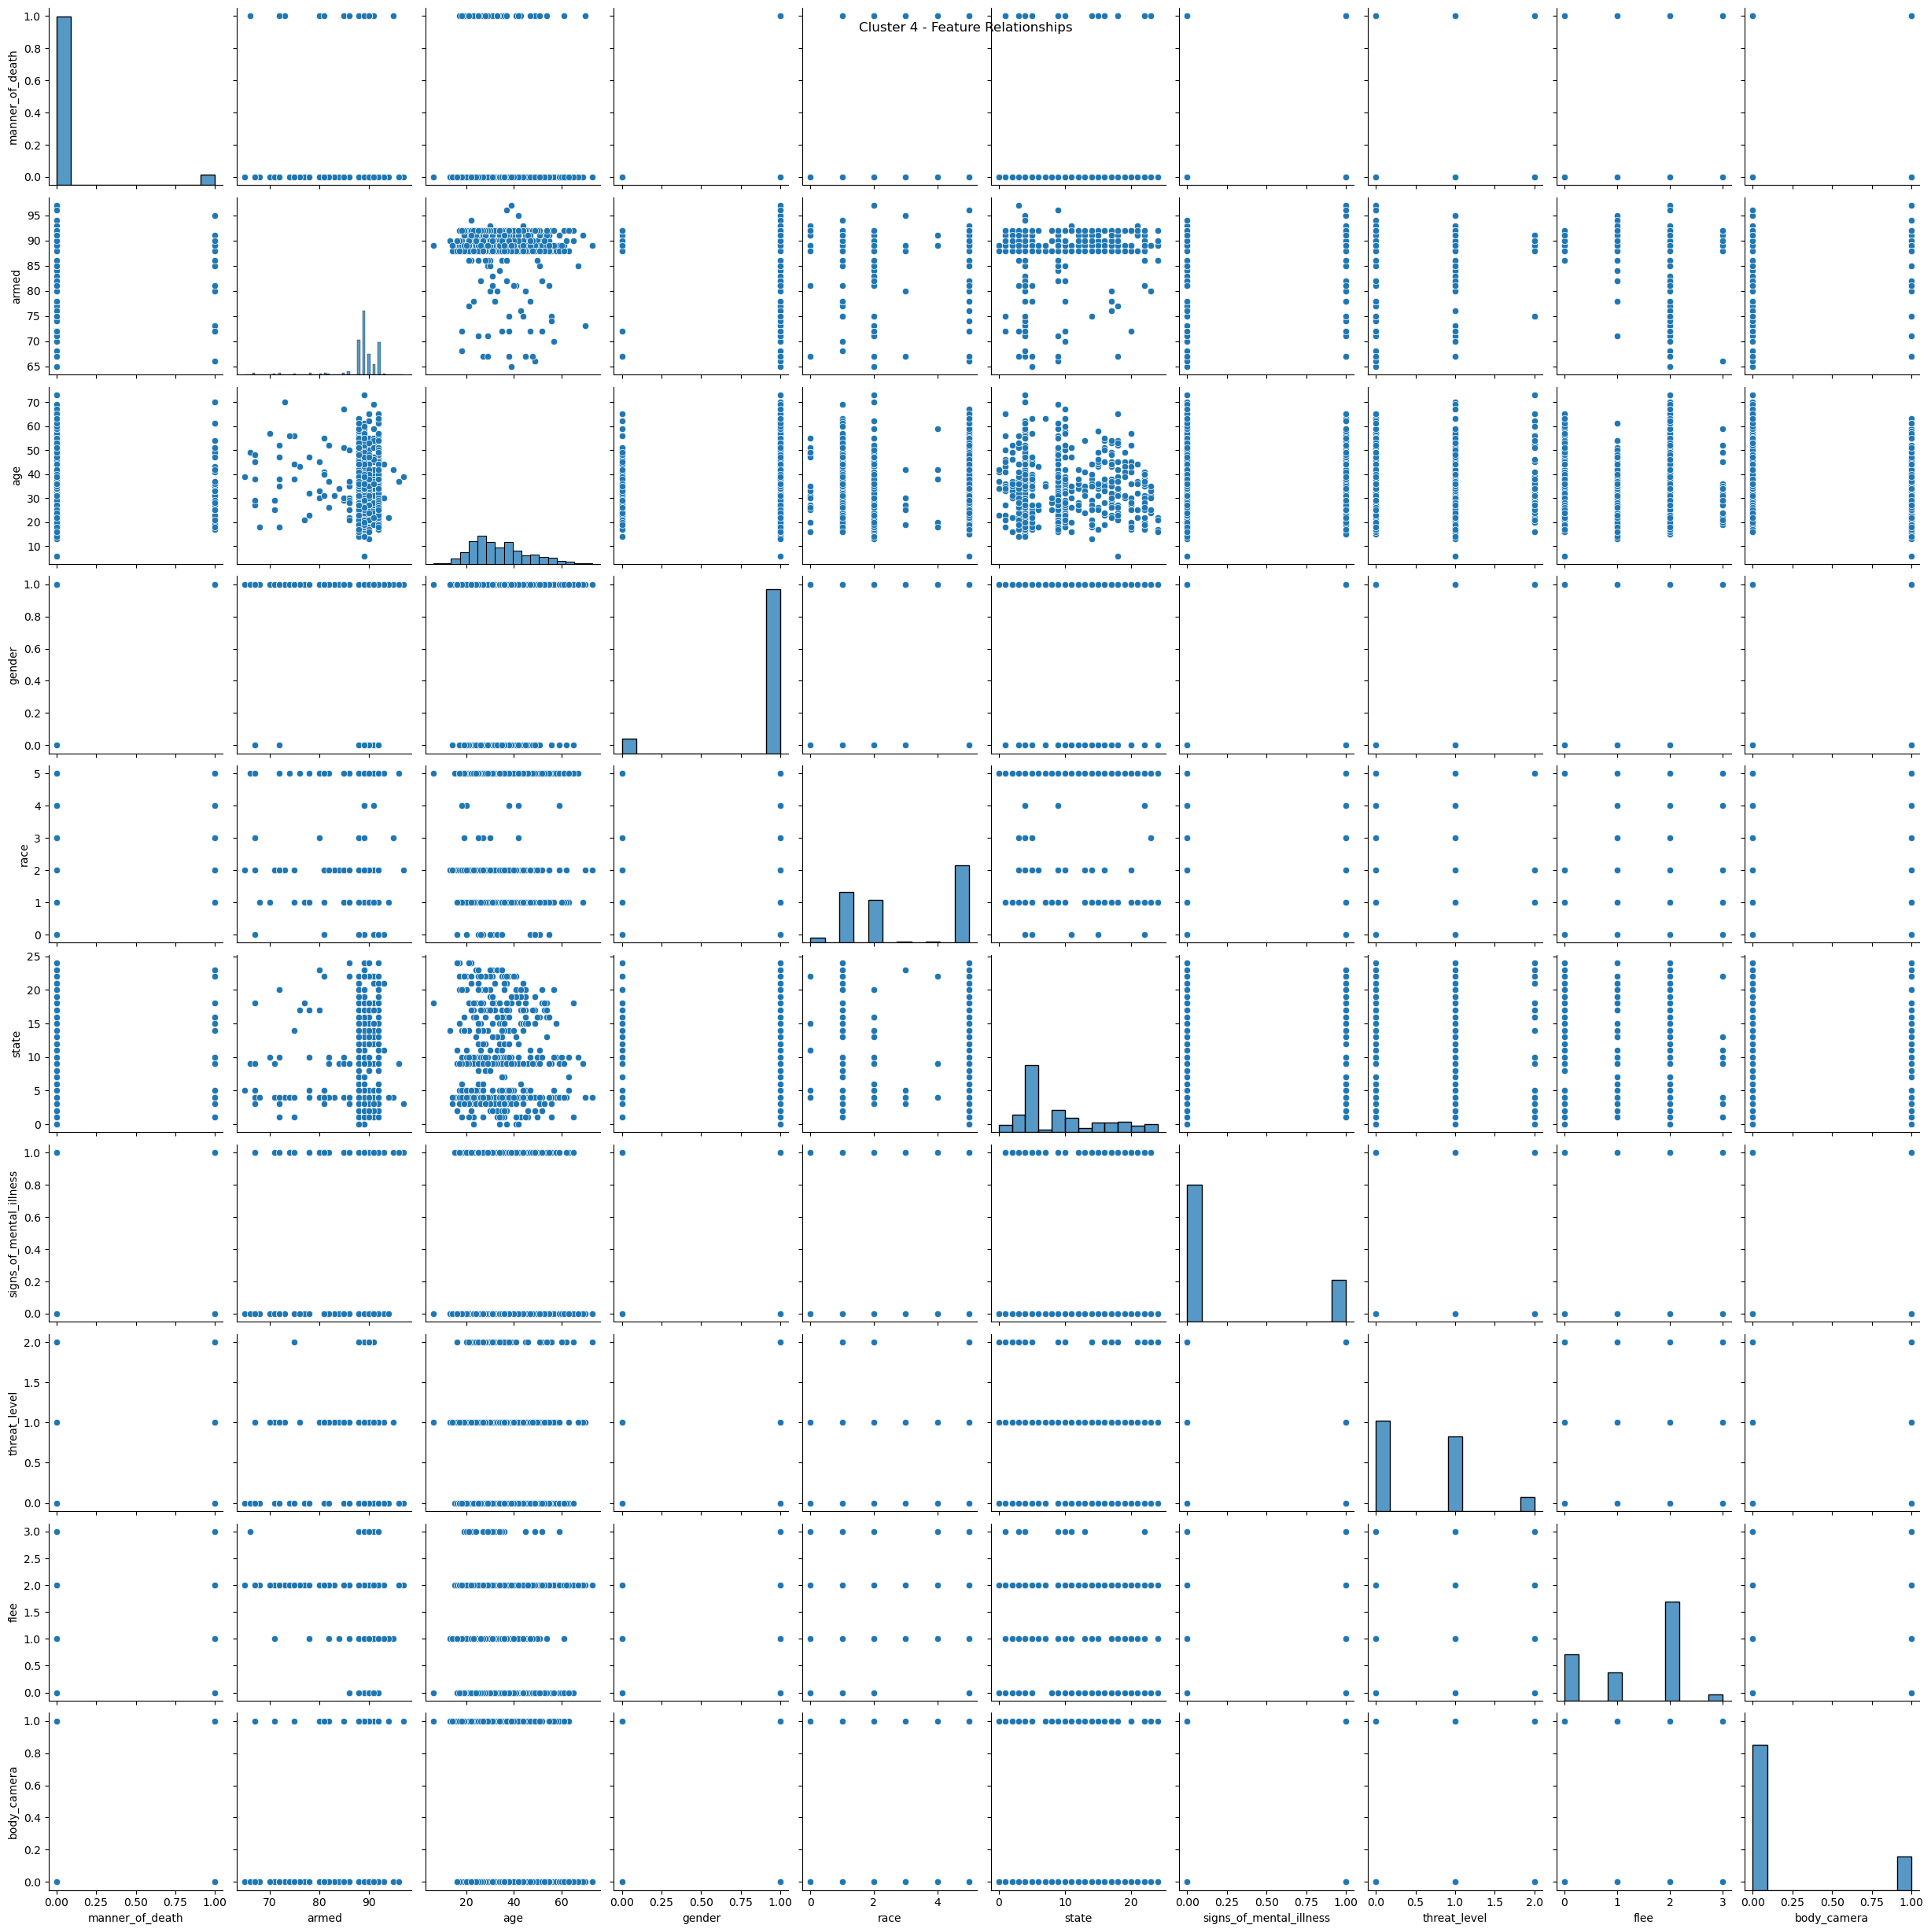

cluster_data,cluster       manner_of_death  armed   age  gender  race  state  \
6                   0     38  22.0       1     2      3   
7                   0     38  35.0       1     5     16   
10                  1     51  25.0       1     5      4   
13                  0     38  30.0       1     5     12   
14                  0     38  37.0       1     1     18   
...               ...    ...   ...     ...   ...    ...   
7969                0     38  36.0       1     5     10   
7975                0     43  29.0       1     1      9   
7977                0     38  30.0       1     5      3   
7981                0     38  28.0       1     5      4   
7990                0     38  63.0       1     5      9   

      signs_of_mental_illness  threat_level  flee  body_camera  
6                           0             0     0            0  
7                           0             0     2            0  
10                          0             0     2            0  
13        

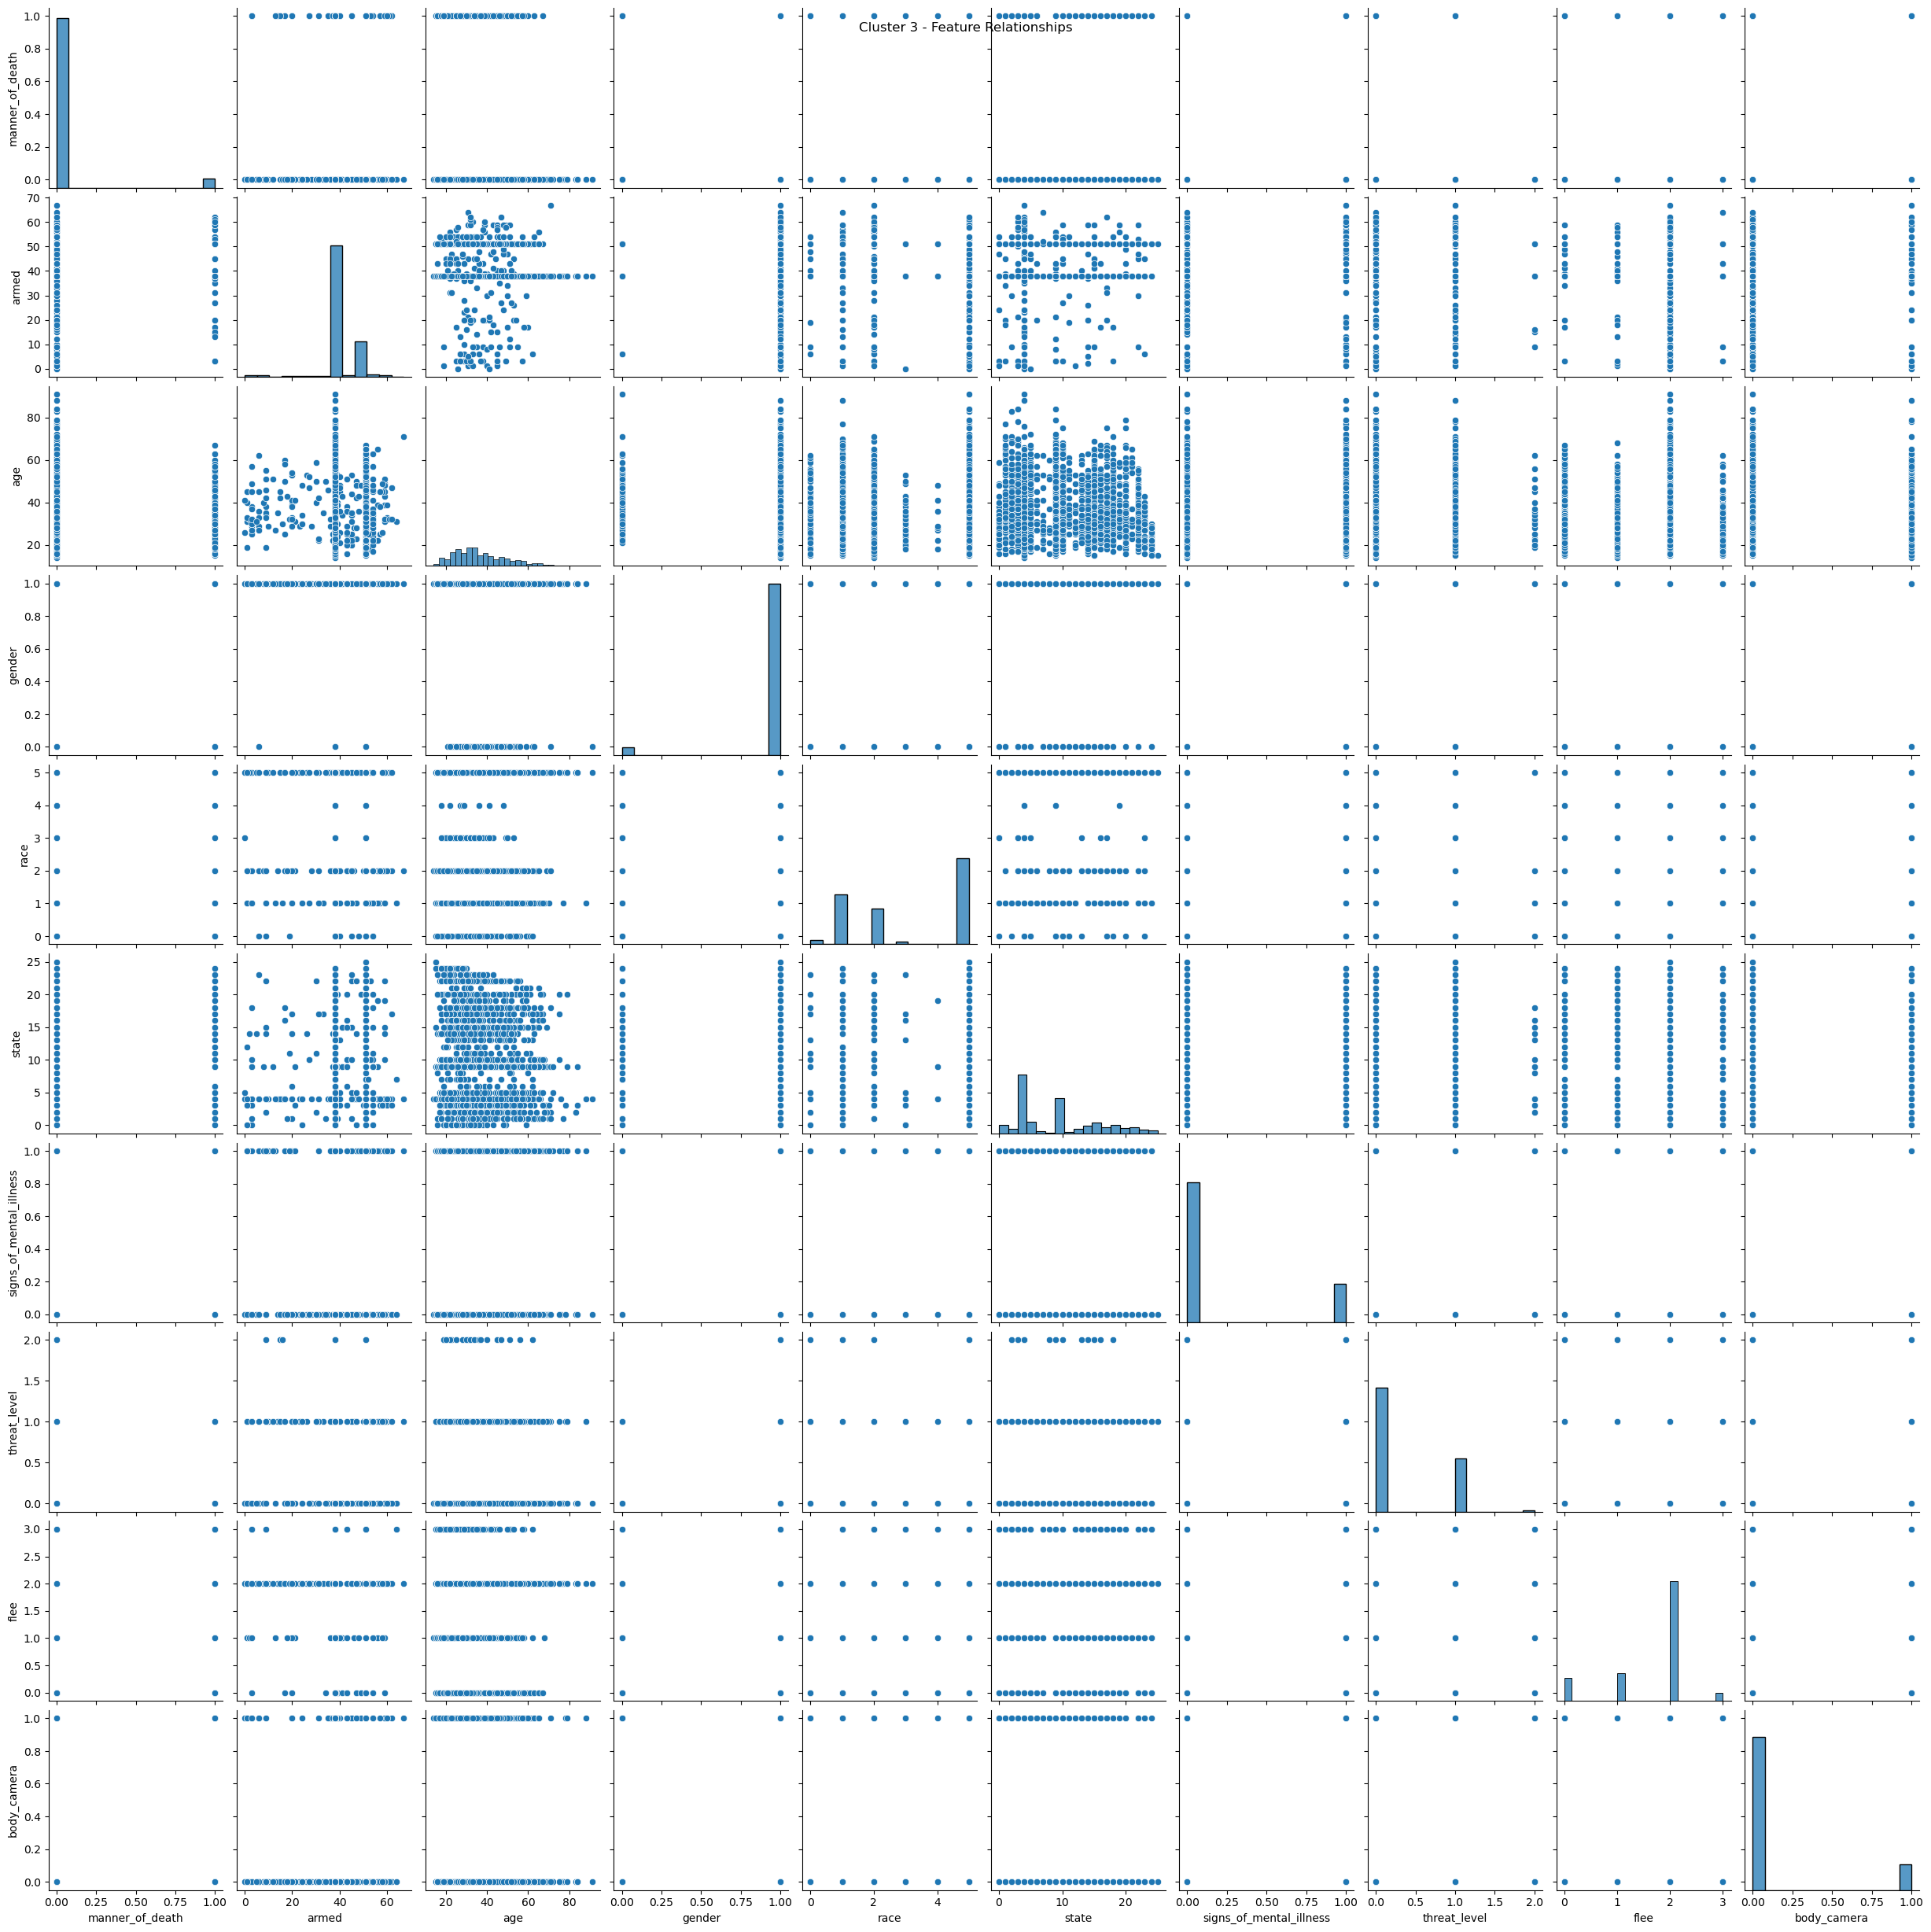

cluster_data,cluster       manner_of_death  armed   age  gender  race  state  \
9                   0     88  47.0       1     1     38   
16                  0     82  42.0       1     5     44   
50                  0     88  25.0       1     1     43   
62                  0     89  24.0       1     2     43   
72                  0     89  42.0       1     5     36   
...               ...    ...   ...     ...   ...    ...   
7816                0     91  49.0       0     3     26   
7854                0     88  33.0       1     0     31   
7884                0     90  21.0       1     2     48   
7912                0     92  39.0       1     1     42   
7936                0     65  39.0       1     5     36   

      signs_of_mental_illness  threat_level  flee  body_camera  
9                           0             0     2            0  
16                          0             0     2            1  
50                          0             0     0            0  
62        

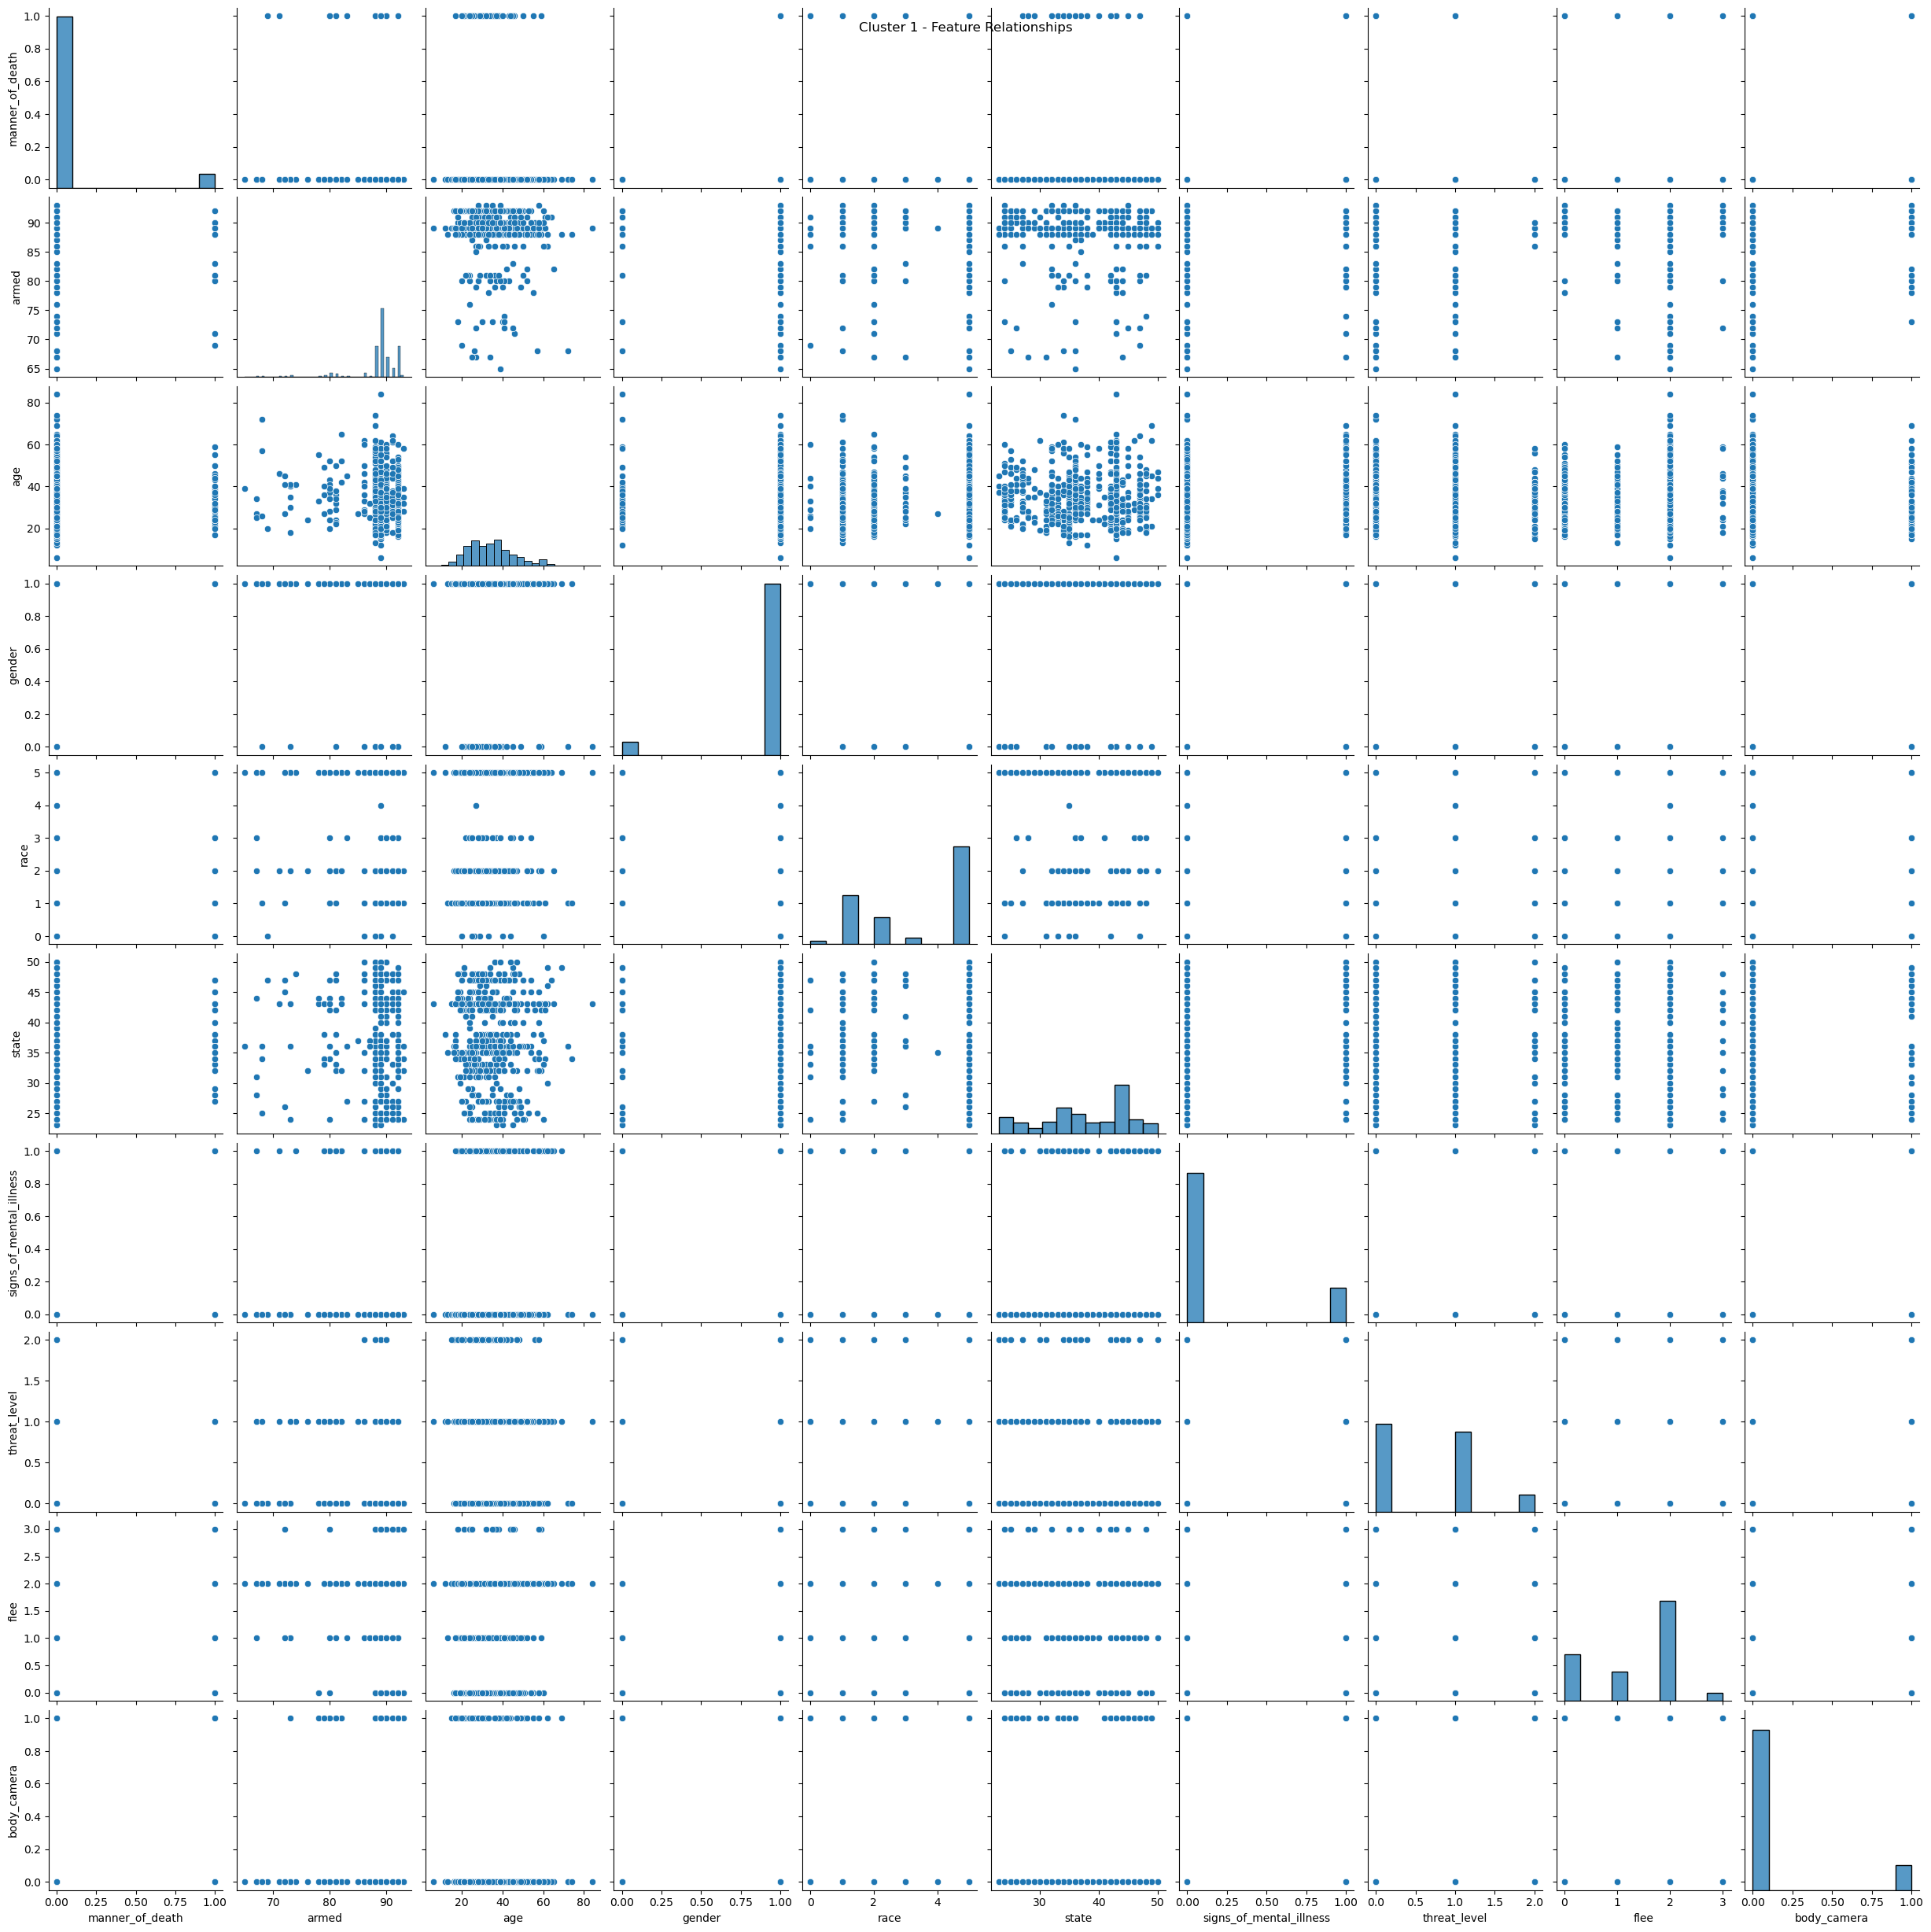

In [29]:
for cluster in endataset['Cluster'].unique():
    cluster_data = endataset[endataset['Cluster'] == cluster].drop('Cluster', axis=1)
    print('cluster_data,cluster',cluster_data)
    sns.pairplot(cluster_data)
    plt.suptitle(f"Cluster {cluster + 1} - Feature Relationships")
    plt.show()

In [30]:
for cluster in endataset['Cluster'].unique():
    cluster_data = endataset[endataset['Cluster'] == cluster].drop('Cluster', axis=1)
    correlation_matrix = cluster_data.corr()
    
    print(f"\nCorrelation Matrix for Cluster {cluster + 1}:\n")
    print(correlation_matrix)


Correlation Matrix for Cluster 2:

                         manner_of_death     armed       age    gender  \
manner_of_death                 1.000000  0.134194  0.000862 -0.008641   
armed                           0.134194  1.000000 -0.012121  0.006019   
age                             0.000862 -0.012121  1.000000 -0.035541   
gender                         -0.008641  0.006019 -0.035541  1.000000   
race                           -0.047540 -0.011038  0.273286 -0.040780   
state                           0.004812  0.019459 -0.048084 -0.011373   
signs_of_mental_illness         0.028382  0.104365  0.084350 -0.093266   
threat_level                    0.120725  0.215957 -0.026645 -0.013251   
flee                            0.009274  0.066631  0.134822 -0.029332   
body_camera                     0.085337  0.033304 -0.038947  0.009922   

                             race     state  signs_of_mental_illness  \
manner_of_death         -0.047540  0.004812                 0.028382   
armed

In [31]:
average_correlations=[]
for cluster in endataset['Cluster'].unique():
    cluster_data = endataset[endataset['Cluster'] == cluster].drop('Cluster', axis=1)
    correlation_matrix = cluster_data.corr()
    average_correlation = np.mean(correlation_matrix.abs().values)
    average_correlations.append(average_correlation)

# Identify the cluster with the highest average correlation
best_cluster = np.argmax(average_correlations)

# Display endataset matrix for the cluster with the highest average correlation
best_cluster_data = endataset[endataset['Cluster'] == best_cluster].drop('Cluster', axis=1)
best_cluster_correlation_matrix = best_cluster_data.corr()

print(f"\nCorrelation Matrix for Cluster {best_cluster + 1} (Highest Average Correlation):\n")
print(best_cluster_correlation_matrix)


Correlation Matrix for Cluster 2 (Highest Average Correlation):

                         manner_of_death     armed       age    gender  \
manner_of_death                 1.000000  0.134194  0.000862 -0.008641   
armed                           0.134194  1.000000 -0.012121  0.006019   
age                             0.000862 -0.012121  1.000000 -0.035541   
gender                         -0.008641  0.006019 -0.035541  1.000000   
race                           -0.047540 -0.011038  0.273286 -0.040780   
state                           0.004812  0.019459 -0.048084 -0.011373   
signs_of_mental_illness         0.028382  0.104365  0.084350 -0.093266   
threat_level                    0.120725  0.215957 -0.026645 -0.013251   
flee                            0.009274  0.066631  0.134822 -0.029332   
body_camera                     0.085337  0.033304 -0.038947  0.009922   

                             race     state  signs_of_mental_illness  \
manner_of_death         -0.047540  0.004812    

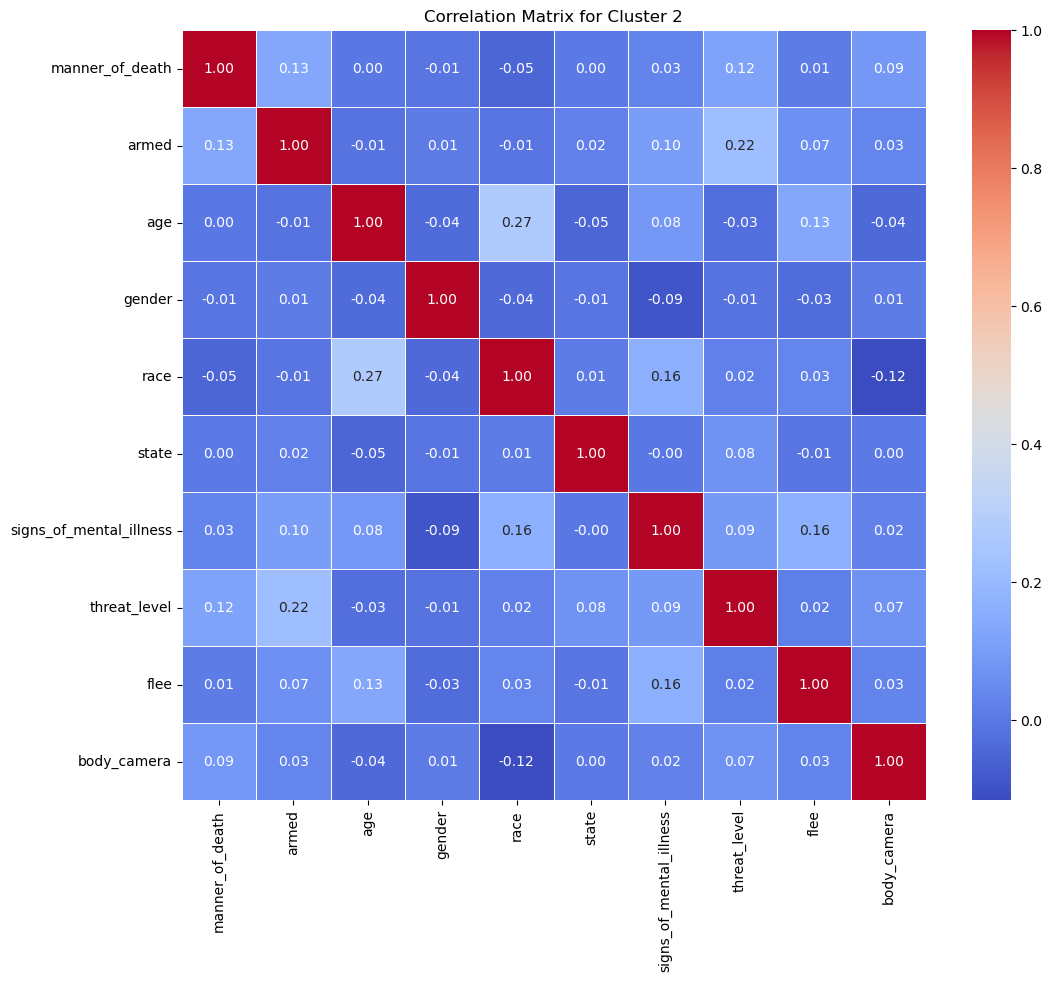

In [32]:
plt.figure(figsize=(12, 10))
sns.heatmap(best_cluster_correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title(f"Correlation Matrix for Cluster {best_cluster + 1}")
plt.show()

most_correlated_features = []
used_features = set()

for feature in best_cluster_correlation_matrix.columns:
    # Find the most correlated feature that hasn't been used yet
    correlated_feature = best_cluster_correlation_matrix[feature].idxmax()
    while correlated_feature == feature or correlated_feature in used_features:
        best_cluster_correlation_matrix.at[feature, correlated_feature] = 0
        correlated_feature = best_cluster_correlation_matrix[feature].idxmax()
    
    correlation_value = best_cluster_correlation_matrix[feature][correlated_feature]
    most_correlated_features.append((feature, correlated_feature, correlation_value))
    
    # Mark used features to ensure they are not reused
    used_features.add(feature)
    used_features.add(correlated_feature)

print(f"\nMost Correlated Feature Pairs for Cluster {best_cluster + 1} (Highest Average Correlation):\n")
for feature_pair in most_correlated_features:
    print(f"{feature_pair[0]} and {feature_pair[1]}: {feature_pair[2]:.4f}")

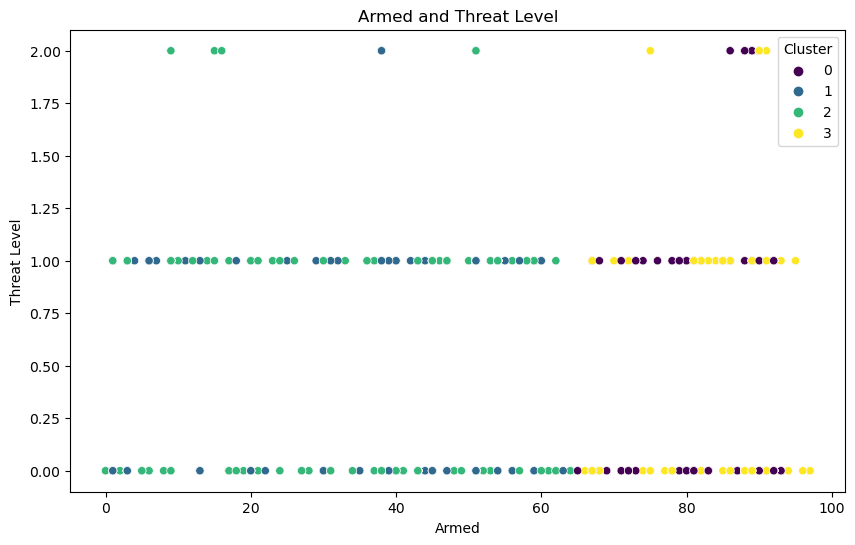

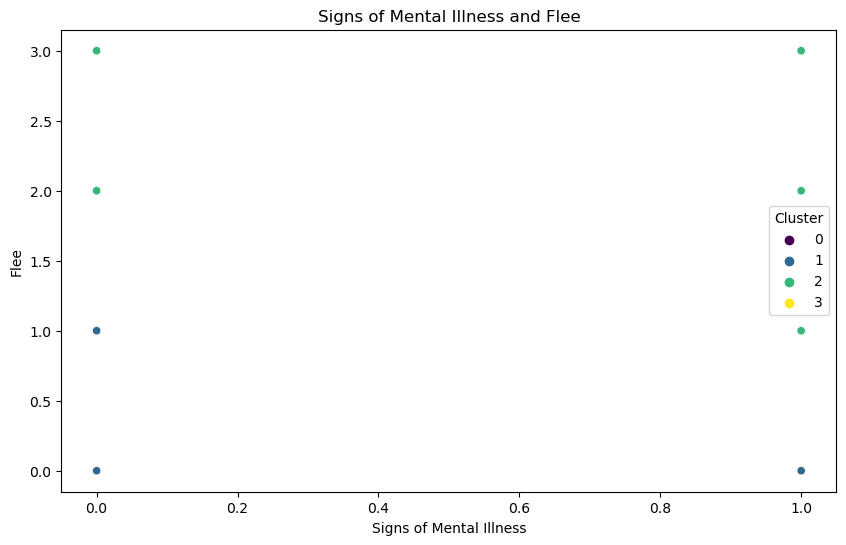

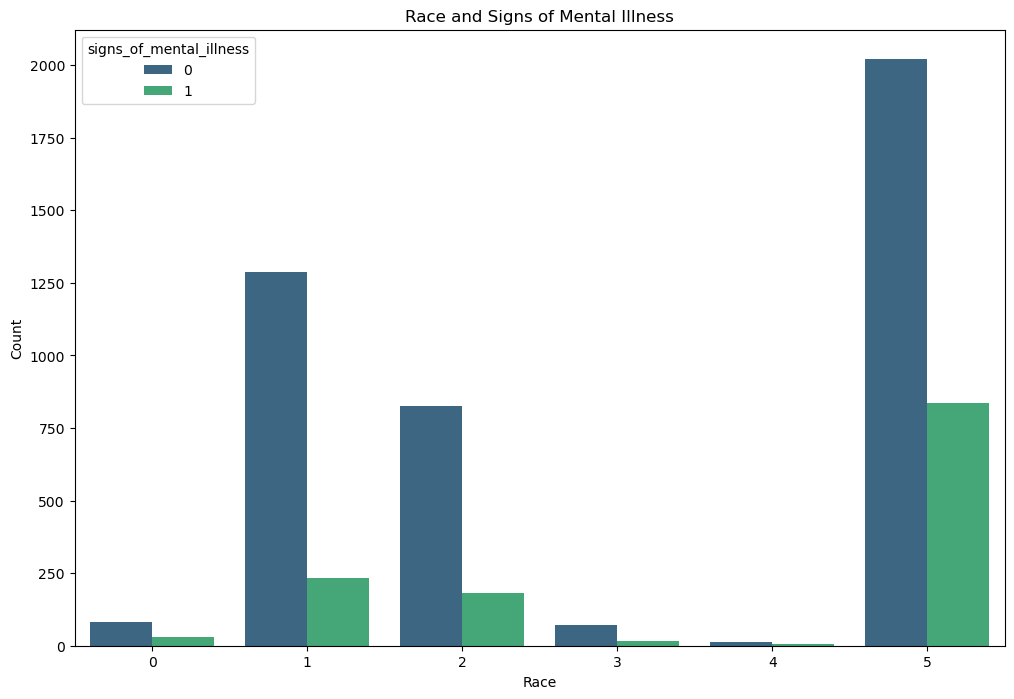

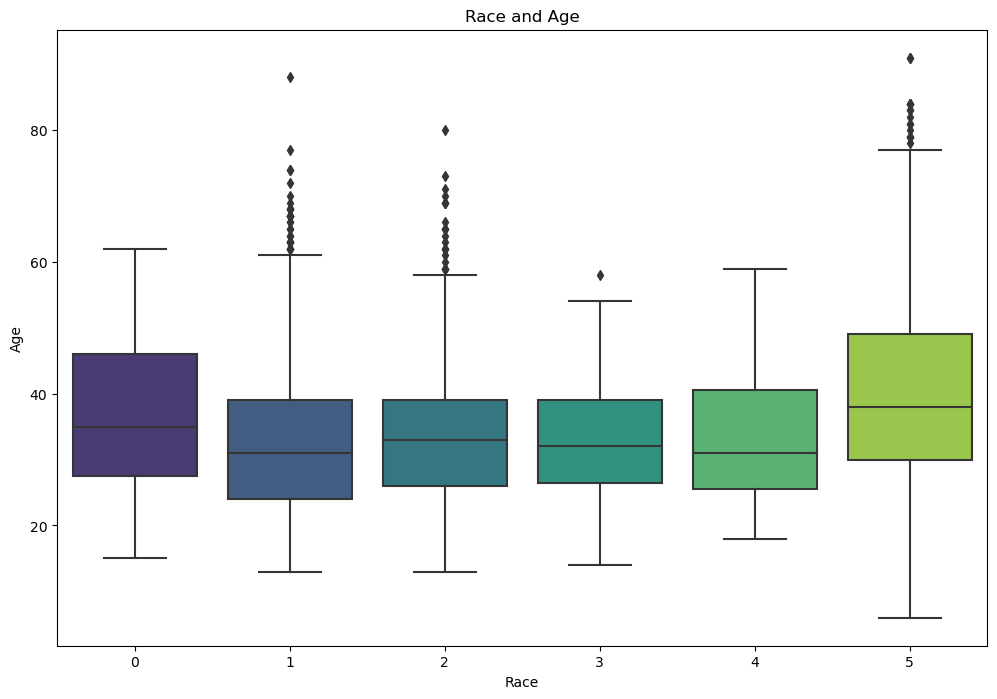

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='armed', y='threat_level', data=endataset, hue='Cluster', palette='viridis')
plt.title('Armed and Threat Level')
plt.xlabel('Armed')
plt.ylabel('Threat Level')
plt.show()

# Visualizations for Signs of Mental Illness and Flee
plt.figure(figsize=(10, 6))
sns.scatterplot(x='signs_of_mental_illness', y='flee', data=endataset, hue='Cluster', palette='viridis')
plt.title('Signs of Mental Illness and Flee')
plt.xlabel('Signs of Mental Illness')
plt.ylabel('Flee')
plt.show()

# Visualizations for Race and Signs of Mental Illness
# (Assuming 'race' is a categorical variable)
plt.figure(figsize=(12, 8))
sns.countplot(x='race', hue='signs_of_mental_illness', data=endataset, palette='viridis')
plt.title('Race and Signs of Mental Illness')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

# Visualizations for Race and Age
# (Assuming 'race' is a categorical variable)
plt.figure(figsize=(12, 8))
sns.boxplot(x='race', y='age', data=endataset, palette='viridis')
plt.title('Race and Age')
plt.xlabel('Race')
plt.ylabel('Age')
plt.show()